In [1]:
# libraries importing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from algorithms.Conv_AE import Conv_AE
import numpy as np
import os
from IPython.display import display

from Pipelines.Conv_AE_pipelines import eval_results, Conv_AE_base, Conv_AE_Example_pipeline, Conv_AE_Example_pipeline2
from data_processing.process_data import process_data, get_single_df


## Data loading

In [2]:
datasets = process_data()

valve1_X =  datasets["valve1_X"]
valve1_y = datasets["valve1_y"]
valve2_X = datasets["valve2_X"]
valve2_y = datasets["valve2_y"]
other_anomaly_X = datasets["other_anomaly_X"]
other_anomaly_y = datasets["other_anomaly_y"]

In [3]:
X, y = get_single_df()

In [4]:
steps = ["Add Rolling Stats", "Scaling", "Outlier capping", "Features Selection", "PCA"]

## Pipeline types

In [5]:
base = Conv_AE_base()
base

Pipeline(steps=[('Classifier',
                 <algorithms.Conv_AE.Conv_AE object at 0x2a0fc8160>)])

In [6]:
pipeline1 = Conv_AE_Example_pipeline(X)
pipeline1

Pipeline(steps=[('Add Rolling Stats',
                 FunctionTransformer(func=<function add_rolling_stats at 0x2a0f49750>,
                                     kw_args={'columns': Index(['Accelerometer1RMS', 'Accelerometer2RMS', 'Current', 'Pressure',
       'Temperature', 'Thermocouple', 'Voltage', 'Volume Flow RateRMS'],
      dtype='object'),
                                              'time_diff': '1min'})),
                ('Scaler', StandardScaler()),
                ('PCA', PCA(n_components='mle', svd_solver='full')),
                ('Features Selection',
                 SelectBySingleFeaturePerformance(cv=2,
                                                  estimator=RandomForestClassifier(random_state=42))),
                ('Classifier',
                 <algorithms.Conv_AE.Conv_AE object at 0x2a0fca050>)])

In [7]:
pipeline2 = Conv_AE_Example_pipeline2()
pipeline2

Pipeline(steps=[('Outlier capping',
                 Winsorizer(capping_method='quantiles', fold=0.05,
                            tail='both')),
                ('PCA', PCA(n_components='mle', svd_solver='full')),
                ('Features Selection',
                 SelectBySingleFeaturePerformance(cv=2,
                                                  estimator=RandomForestClassifier(random_state=42))),
                ('Classifier',
                 <algorithms.Conv_AE.Conv_AE object at 0x2a0fc9060>)])

### Combined dataset

214/214 [==============================] - 0s 1ms/step


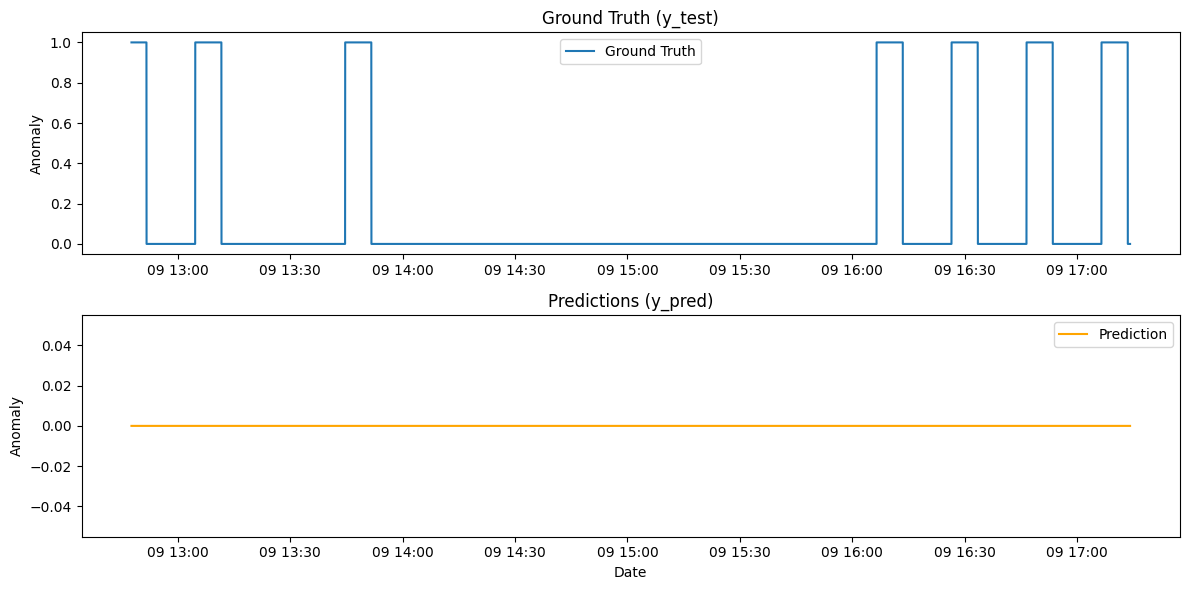

In [8]:
base_benchmark = eval_results(X, y, Q = 0.25)

214/214 [==============================] - 0s 2ms/step


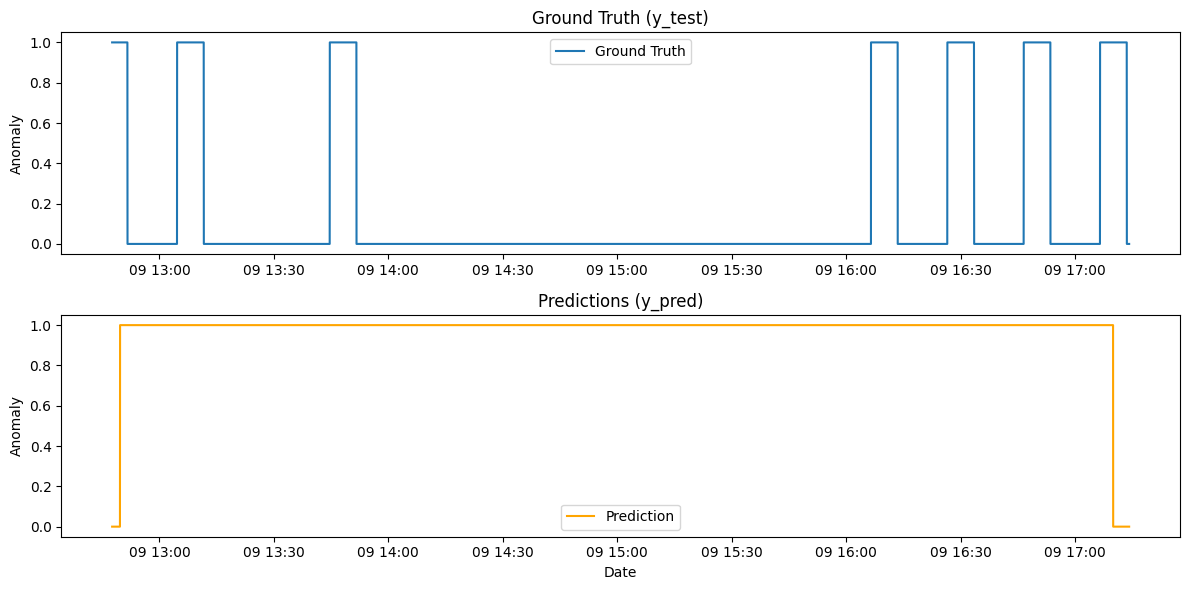

In [9]:
pipe_steps = ["Outlier capping", "PCA", "Features Selection"]
pipe_benchmark = eval_results(X, y, Q = 0.25, steps = pipe_steps)

214/214 [==============================] - 1s 3ms/step


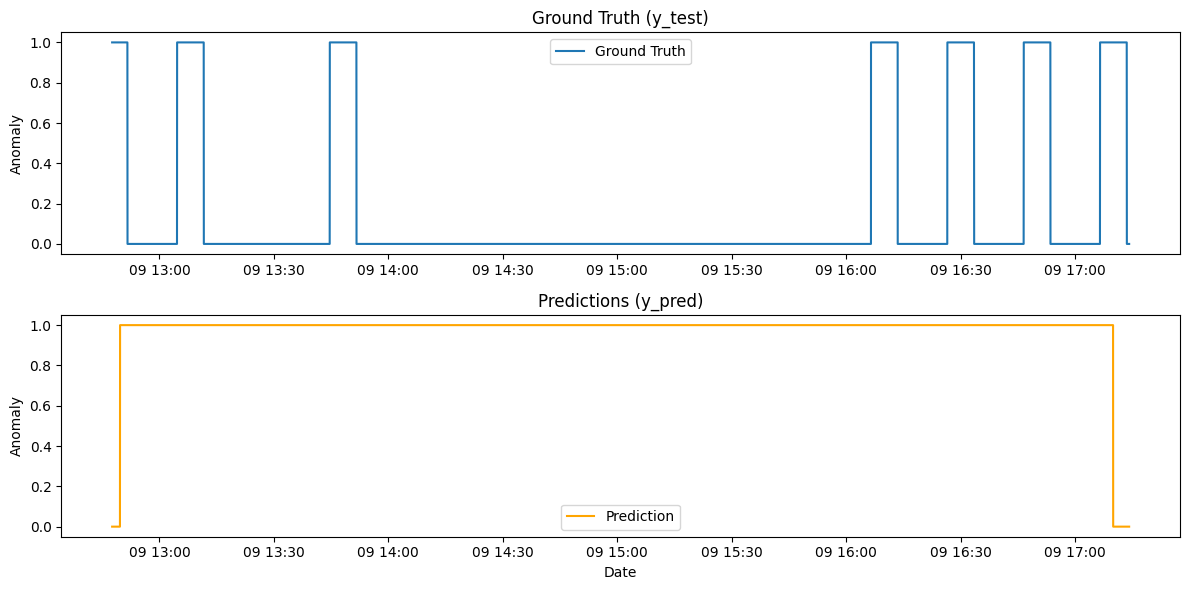

In [10]:
pipe_steps = ["Add Rolling Stats", "Scaling", "PCA", "Features Selection"]
pipe_benchmark2 = eval_results(X, y, Q = 0.25, steps = pipe_steps)

214/214 [==============================] - 1s 3ms/step


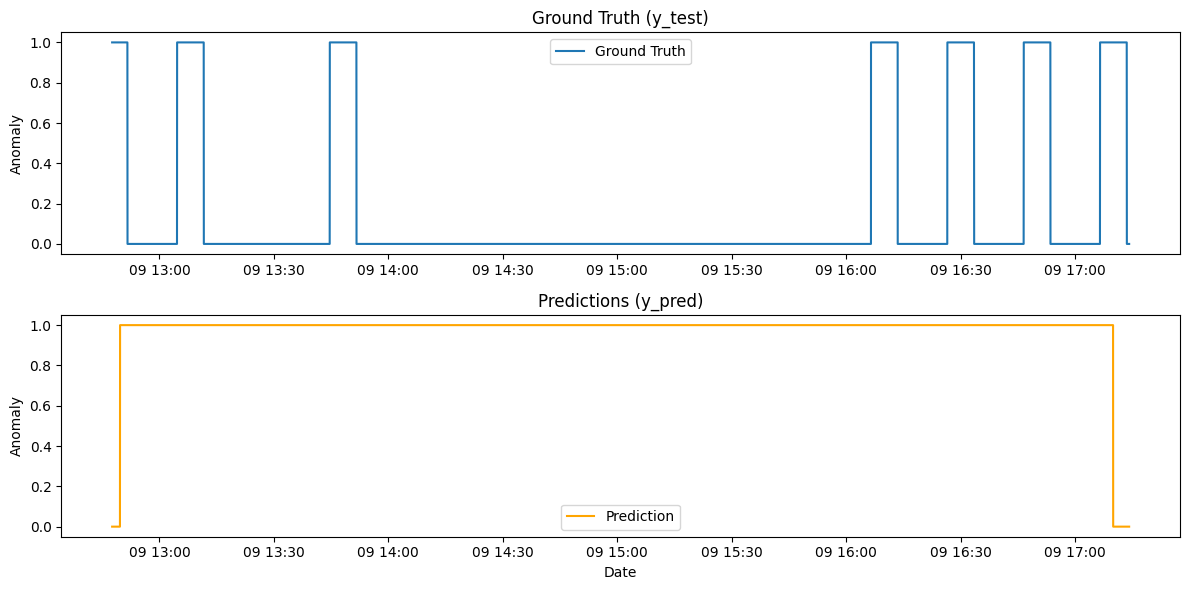

In [11]:
pipe_steps = ["PCA", "Features Selection"]
ablation_study_benchmark1 = eval_results(X, y, Q = 0.25, steps = pipe_steps)

214/214 [==============================] - 0s 2ms/step


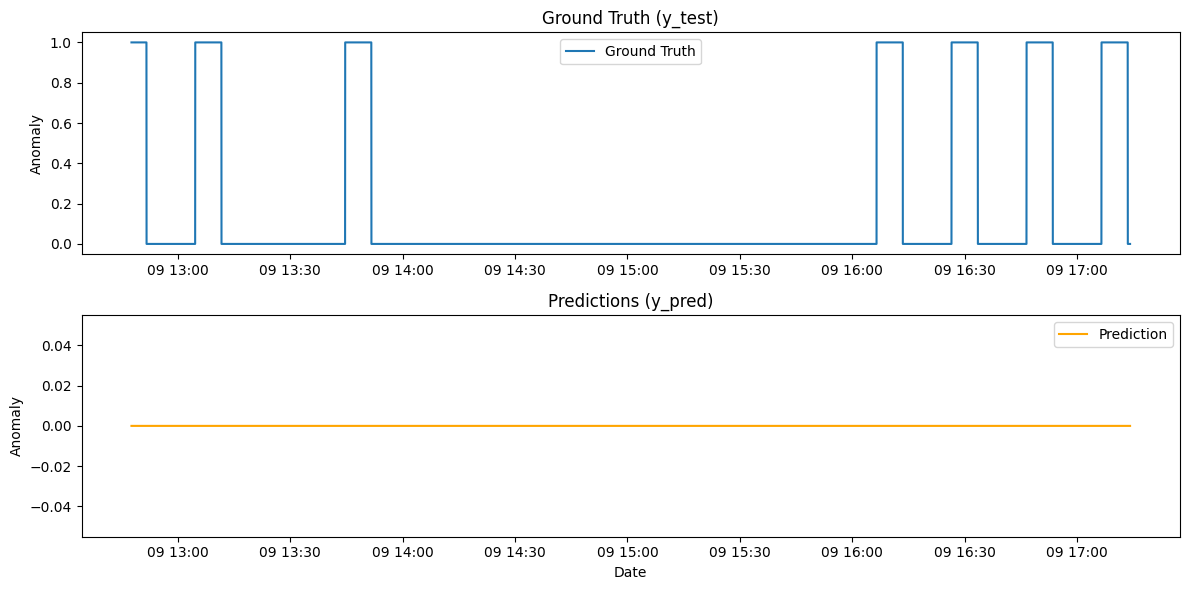

In [12]:
pipe_steps = ["Outlier capping", "Features Selection"]
ablation_study_benchmark2 = eval_results(X, y, Q = 0.25, steps = pipe_steps)

214/214 [==============================] - 1s 3ms/step


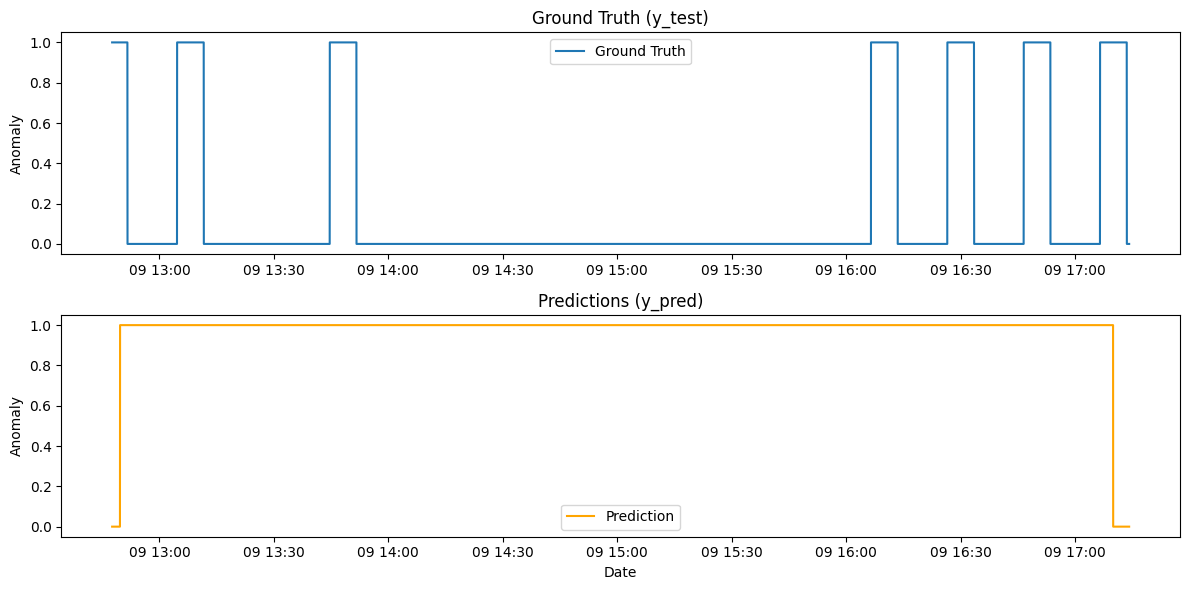

In [13]:
pipe_steps = ["Outlier capping", "PCA"]
ablation_study_benchmark3 = eval_results(X, y, Q = 0.25, steps = pipe_steps)

214/214 [==============================] - 1s 3ms/step


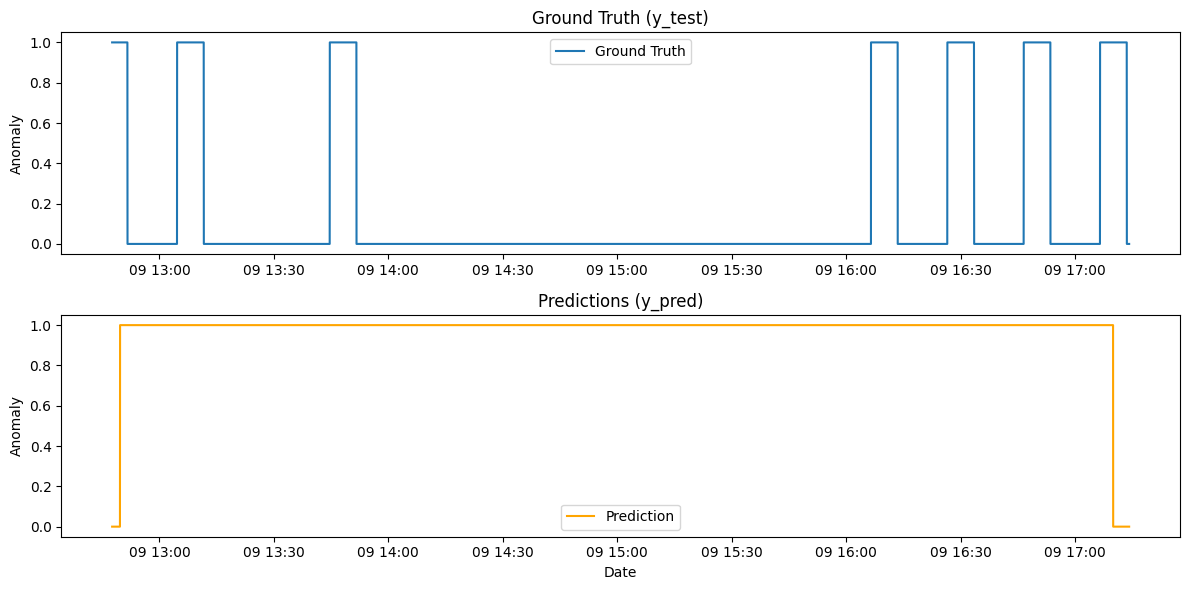

In [14]:
pipe_steps = ["Scaling", "PCA", "Features Selection"]
ablation_study_benchmark4 = eval_results(X, y, Q = 0.25, steps = pipe_steps)

214/214 [==============================] - 1s 3ms/step


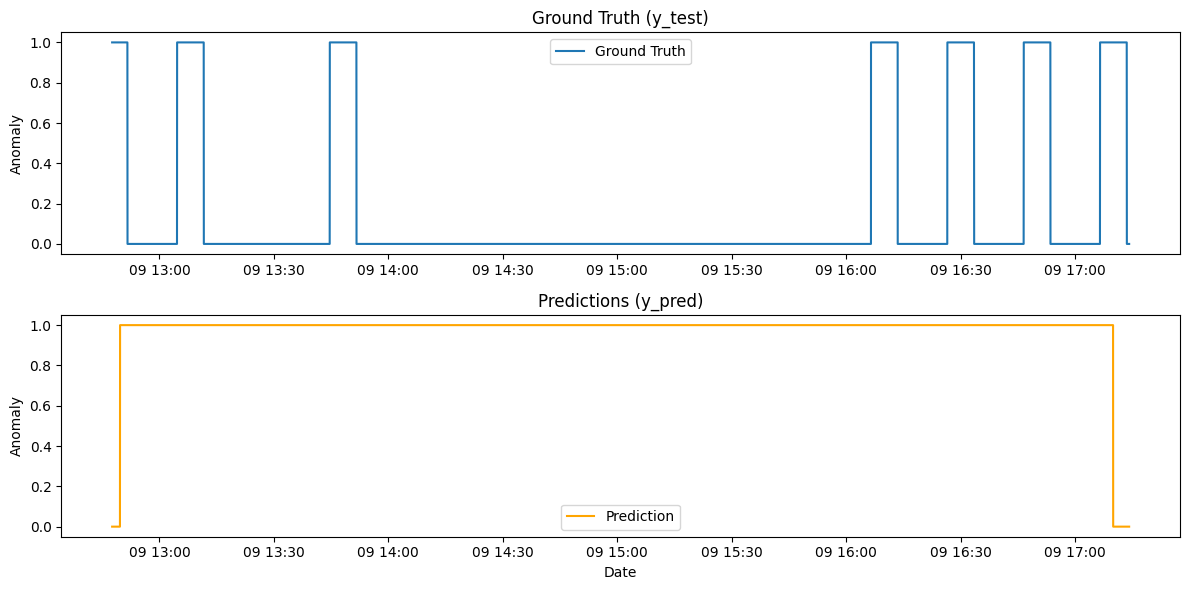

In [15]:
pipe_steps = ["Add Rolling Stats", "PCA", "Features Selection"]
ablation_study_benchmark5 = eval_results(X, y, Q = 0.25, steps = pipe_steps)

214/214 [==============================] - 1s 3ms/step


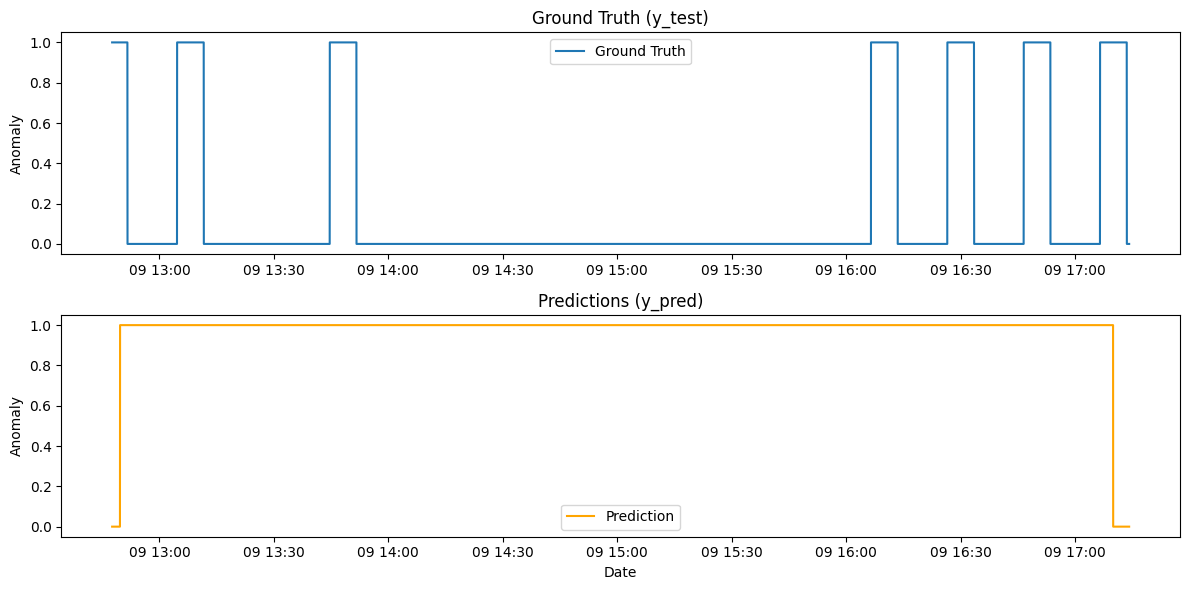

In [16]:
pipe_steps = ["Add Rolling Stats", "Scaling", "Features Selection"]
ablation_study_benchmark6 = eval_results(X, y, Q = 0.25, steps = pipe_steps)

214/214 [==============================] - 1s 3ms/step


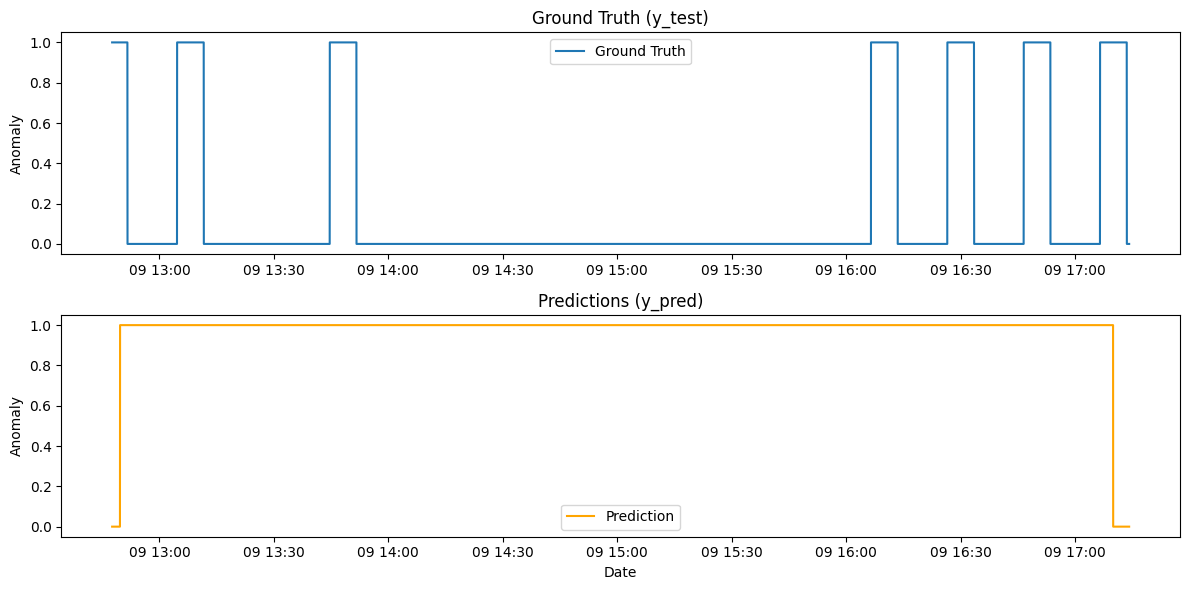

In [17]:
pipe_steps = ["Add Rolling Stats", "Scaling", "PCA",]
ablation_study_benchmark7 = eval_results(X, y, Q = 0.25, steps = pipe_steps)

214/214 [==============================] - 1s 2ms/step


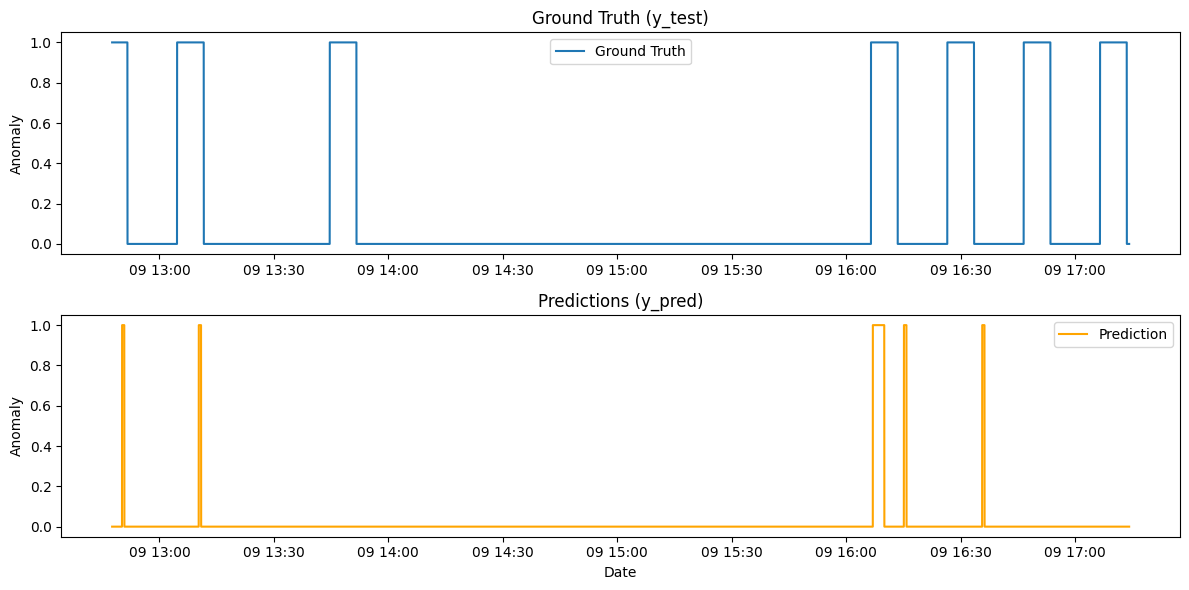

In [18]:
single_step_1 = eval_results(X, y, Q = 0.25, steps = [steps[0]])

214/214 [==============================] - 0s 2ms/step


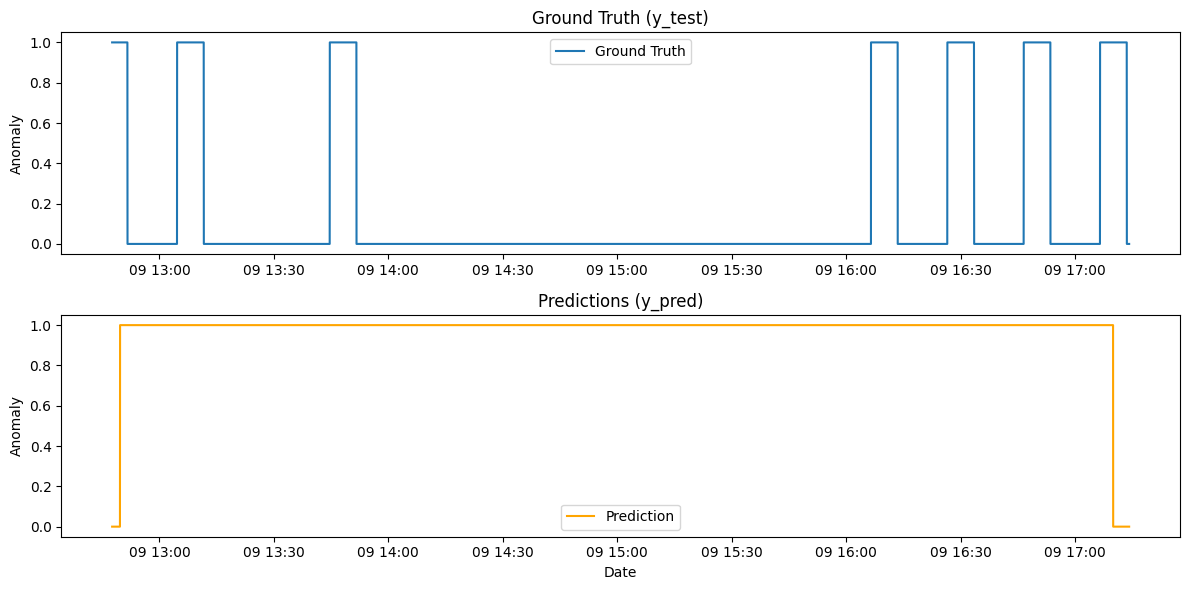

In [19]:
single_step_2 = eval_results(X, y, Q = 0.25,  steps = [steps[1]])

214/214 [==============================] - 0s 2ms/step


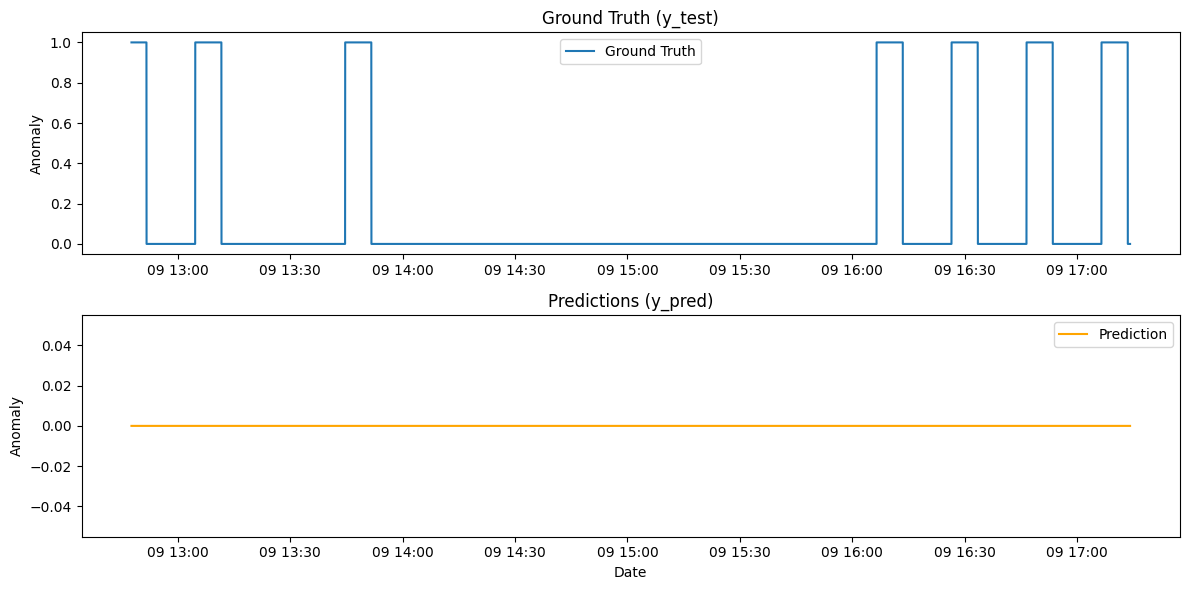

In [20]:
single_step_3 = eval_results(X, y, Q = 0.25,  steps = [steps[2]])

214/214 [==============================] - 0s 2ms/step


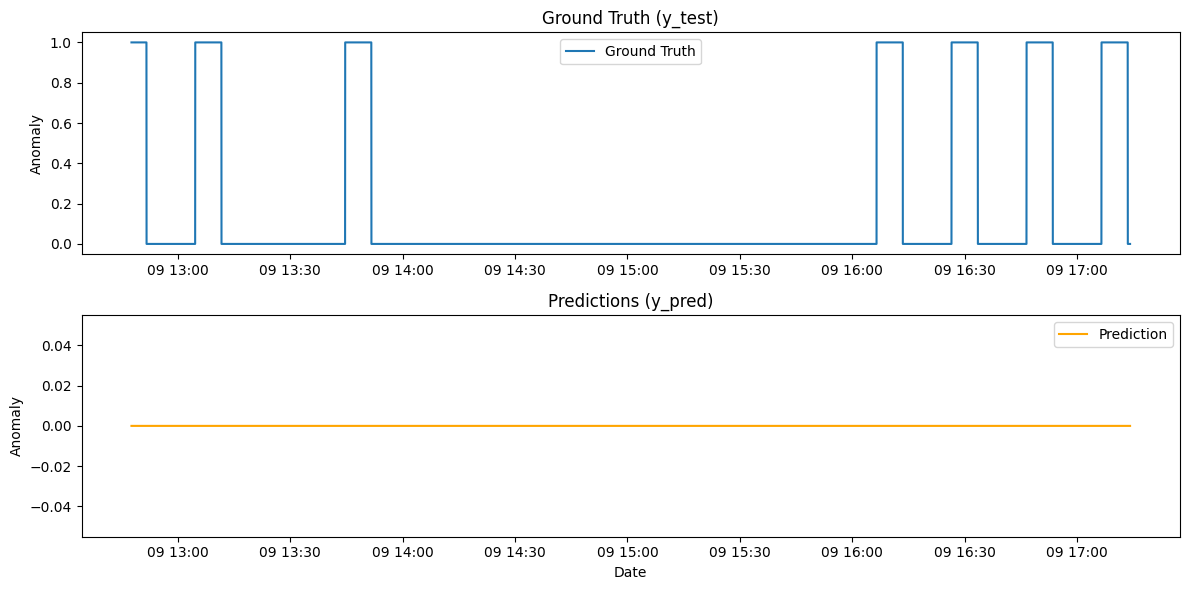

In [21]:
single_step_4 = eval_results(X, y, Q = 0.25,  steps = [steps[3]])

214/214 [==============================] - 0s 2ms/step


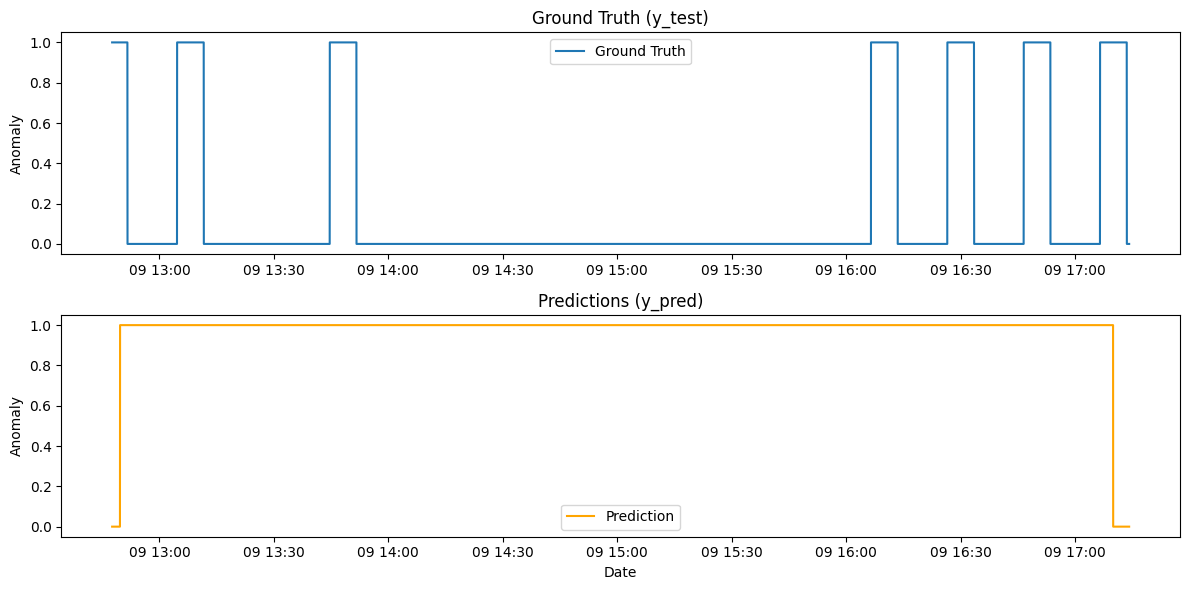

In [22]:
single_step_5 = eval_results(X, y, Q = 0.25,  steps = [steps[4]])

In [23]:
single_df_comparison = pd.concat([base_benchmark,
                                single_step_1,
                                single_step_2,
                                single_step_3,
                                single_step_4,
                                single_step_5,
                                ablation_study_benchmark1,
                                ablation_study_benchmark2,
                                ablation_study_benchmark3,
                                ablation_study_benchmark4,
                                ablation_study_benchmark5,
                                ablation_study_benchmark6,
                                ablation_study_benchmark7,
                                pipe_benchmark,
                                pipe_benchmark2], axis=0).round(3)

display(single_df_comparison)

,steps,FPR (FAR),FNR (MAR),ACC
0,[Classifier],0.000,1.000,0.633
0,"[Add Rolling Stats, Classifier]",0.017,0.906,0.657
0,"[Scaling, Classifier]",0.992,0.126,0.326
0,"[Outlier capping, Classifier]",0.000,1.000,0.633
0,"[Features Selection, Classifier]",0.000,1.000,0.633
0,"[PCA, Classifier]",0.992,0.126,0.326
0,"[PCA, Features Selection, Classifier]",0.992,0.126,0.326
0,"[Outlier capping, Features Selection, Classifier]",0.000,1.000,0.633
0,"[Outlier capping, PCA, Classifier]",0.992,0.126,0.326
0,"[Scaling, PCA, Features Selection, Classifier]",0.992,0.126,0.326


In [24]:
single_df_comparison.to_csv('single_df_comparison_Conv_AE.csv')

### Valve 1

110/110 [==============================] - 0s 2ms/step


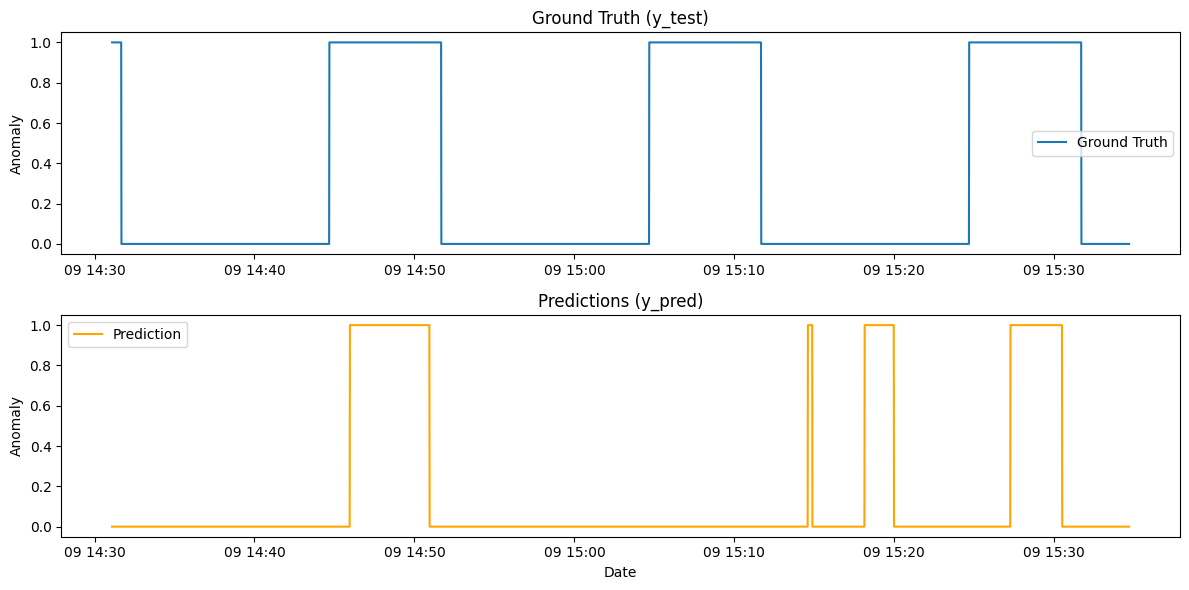

In [25]:
base_benchmark = eval_results(valve1_X, valve1_y, Q = 0.3)

110/110 [==============================] - 0s 3ms/step


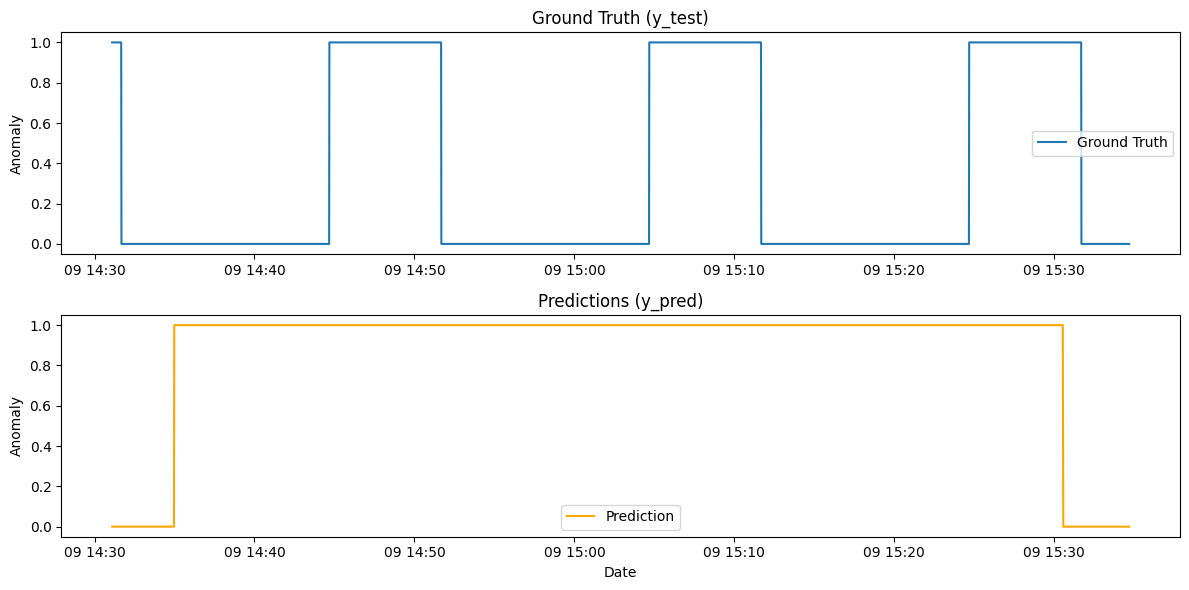

In [26]:
pipe_steps = ["Outlier capping", "PCA", "Features Selection"]
pipe_benchmark = eval_results(valve1_X, valve1_y, Q = 0.3, steps = pipe_steps)

110/110 [==============================] - 0s 2ms/step


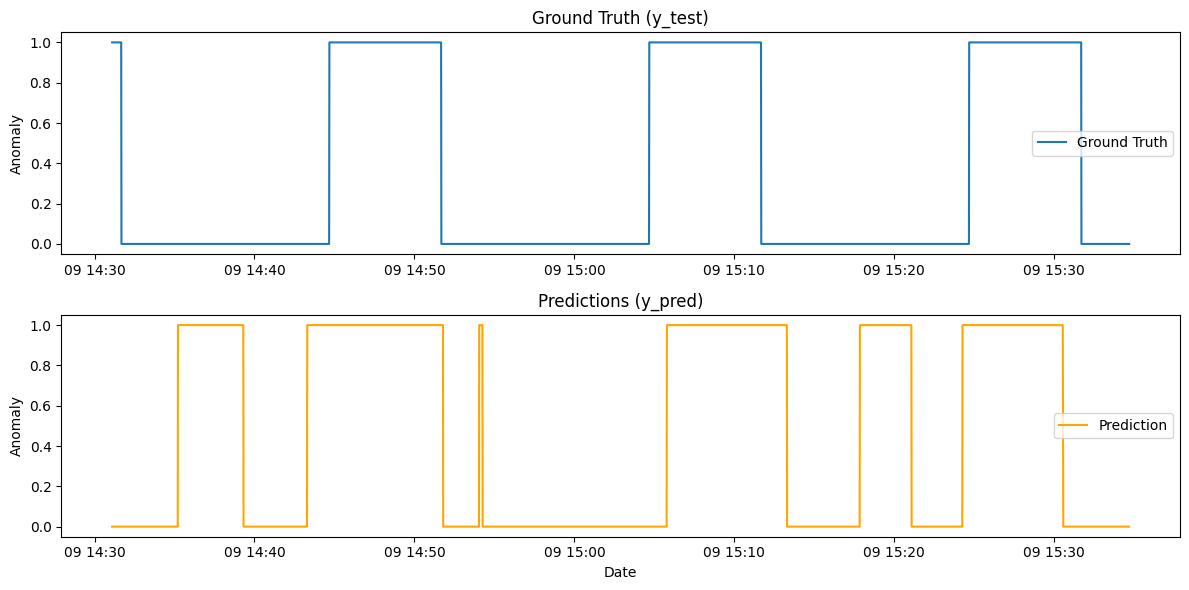

In [27]:
pipe_steps = ["Add Rolling Stats", "Scaling", "PCA", "Features Selection"]
pipe_benchmark2 = eval_results(valve1_X, valve1_y, Q = 0.3, steps = pipe_steps)

110/110 [==============================] - 0s 2ms/step


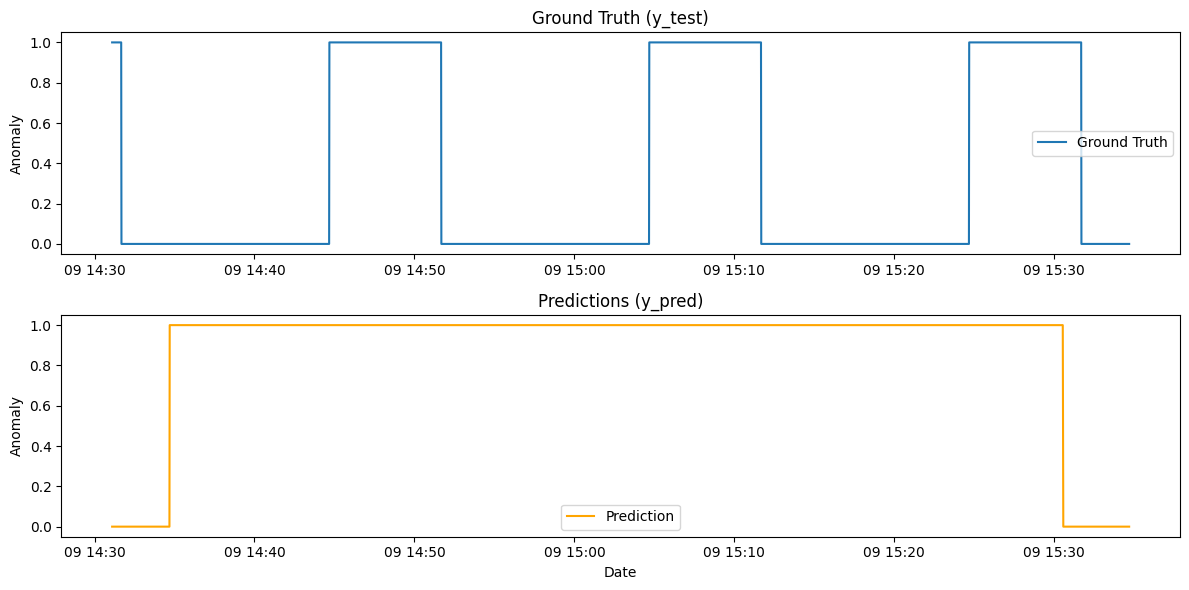

In [28]:
pipe_steps = ["PCA", "Features Selection"]
ablation_study_benchmark1 = eval_results(valve1_X, valve1_y, Q = 0.3, steps = pipe_steps)

110/110 [==============================] - 0s 2ms/step


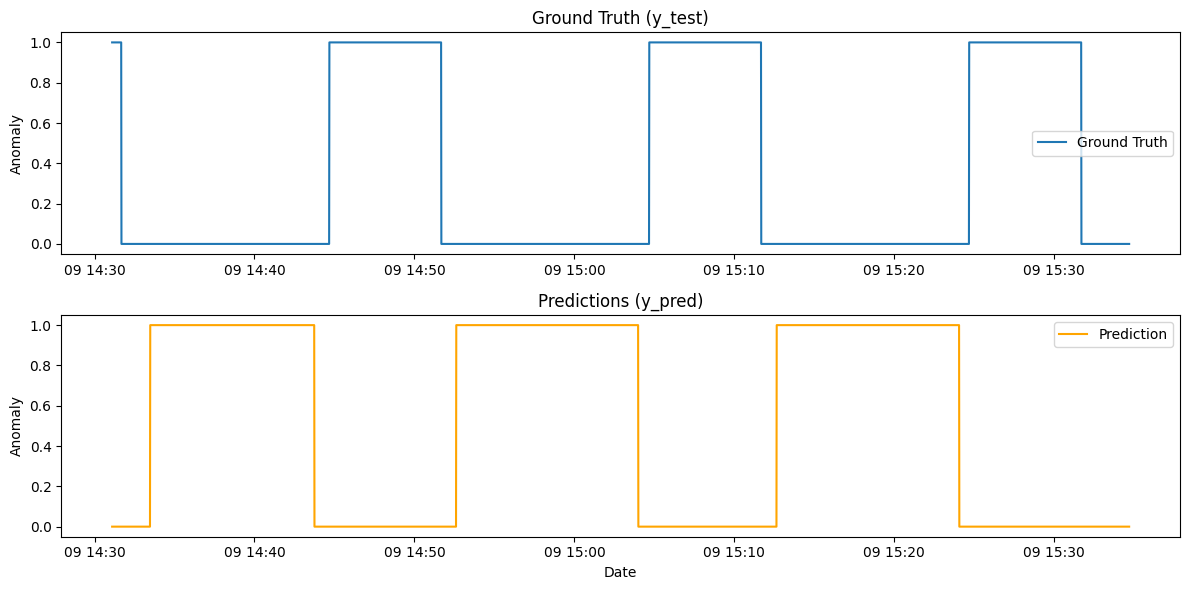

In [29]:
pipe_steps = ["Outlier capping", "Features Selection"]
ablation_study_benchmark2 = eval_results(valve1_X, valve1_y, Q = 0.3, steps = pipe_steps)

110/110 [==============================] - 0s 4ms/step


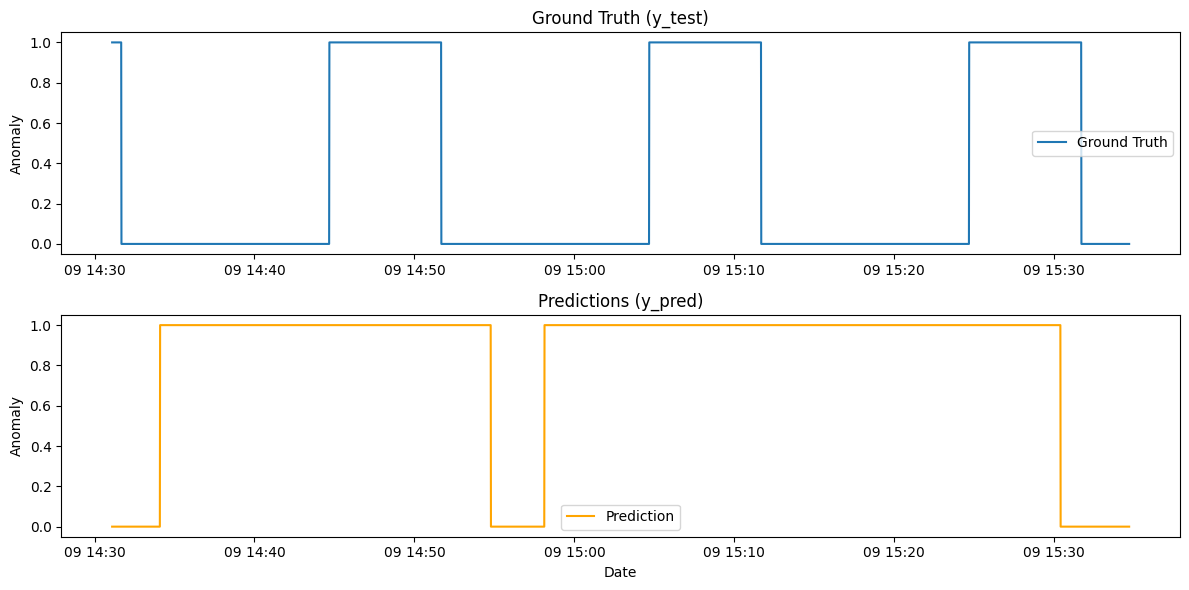

In [30]:
pipe_steps = ["Outlier capping", "PCA"]
ablation_study_benchmark3 = eval_results(valve1_X, valve1_y, Q = 0.3, steps = pipe_steps)

110/110 [==============================] - 0s 2ms/step


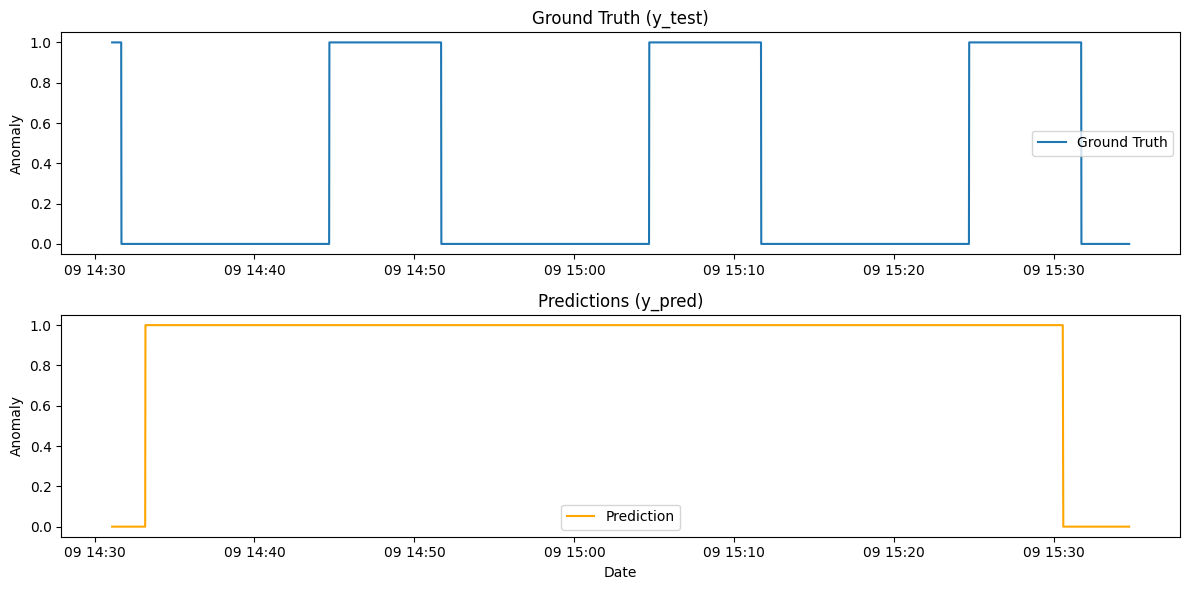

In [31]:
pipe_steps = ["Scaling", "PCA", "Features Selection"]
ablation_study_benchmark4 = eval_results(valve1_X, valve1_y, Q = 0.3, steps = pipe_steps)

110/110 [==============================] - 0s 3ms/step


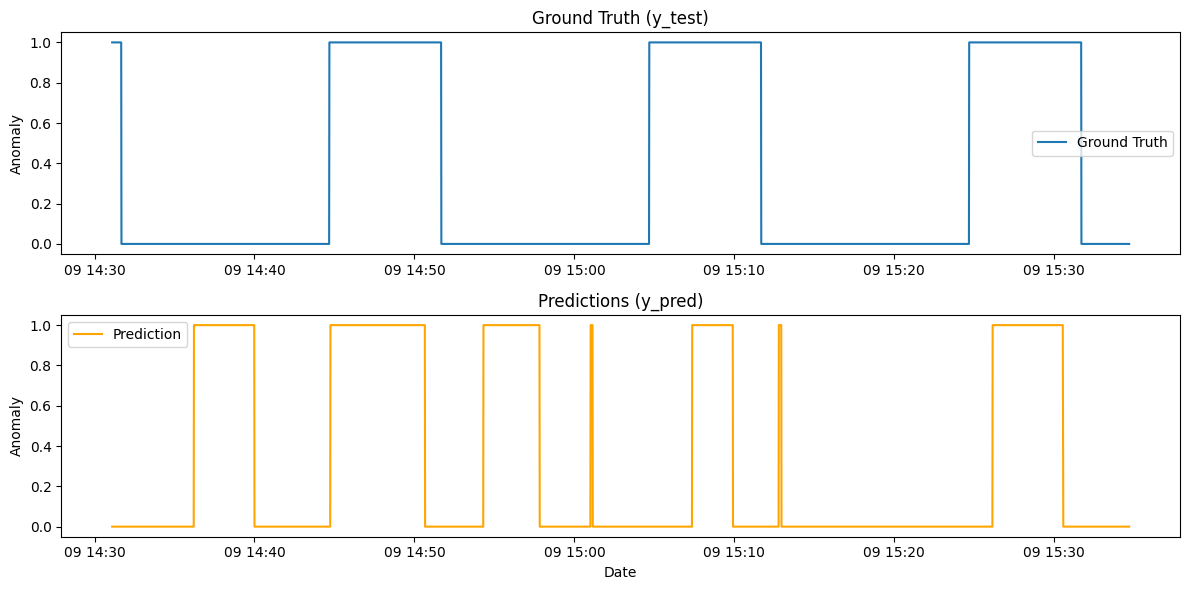

In [32]:
pipe_steps = ["Add Rolling Stats", "PCA", "Features Selection"]
ablation_study_benchmark5 = eval_results(valve1_X, valve1_y, Q = 0.3, steps = pipe_steps)

110/110 [==============================] - 0s 3ms/step


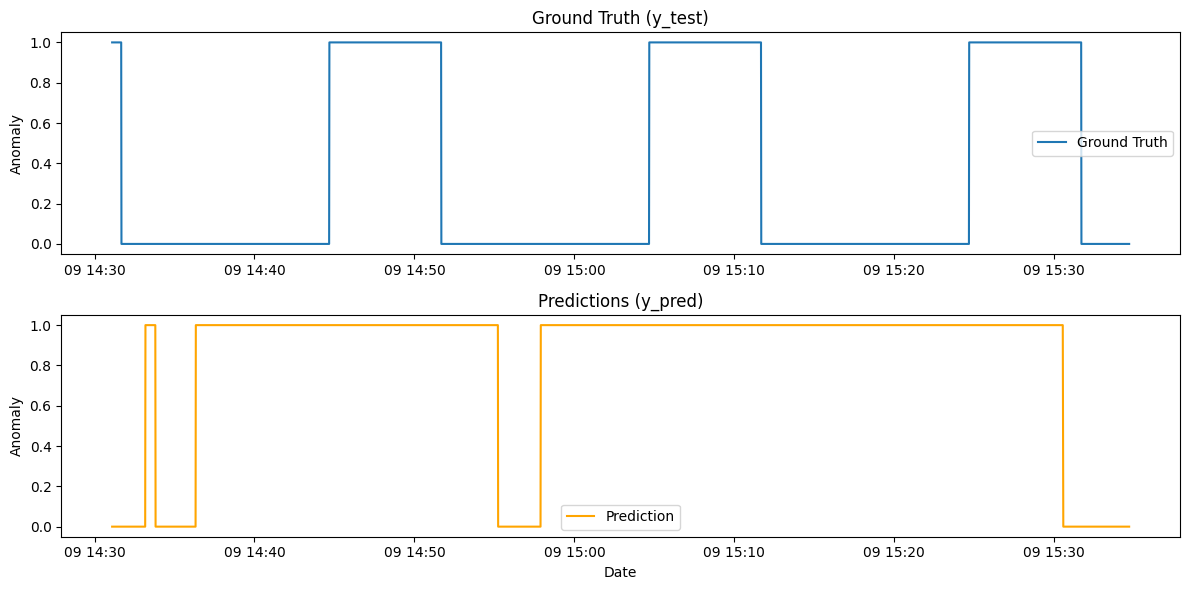

In [33]:
pipe_steps = ["Add Rolling Stats", "Scaling", "Features Selection"]
ablation_study_benchmark6 = eval_results(valve1_X, valve1_y, Q = 0.3, steps = pipe_steps)

110/110 [==============================] - 0s 3ms/step


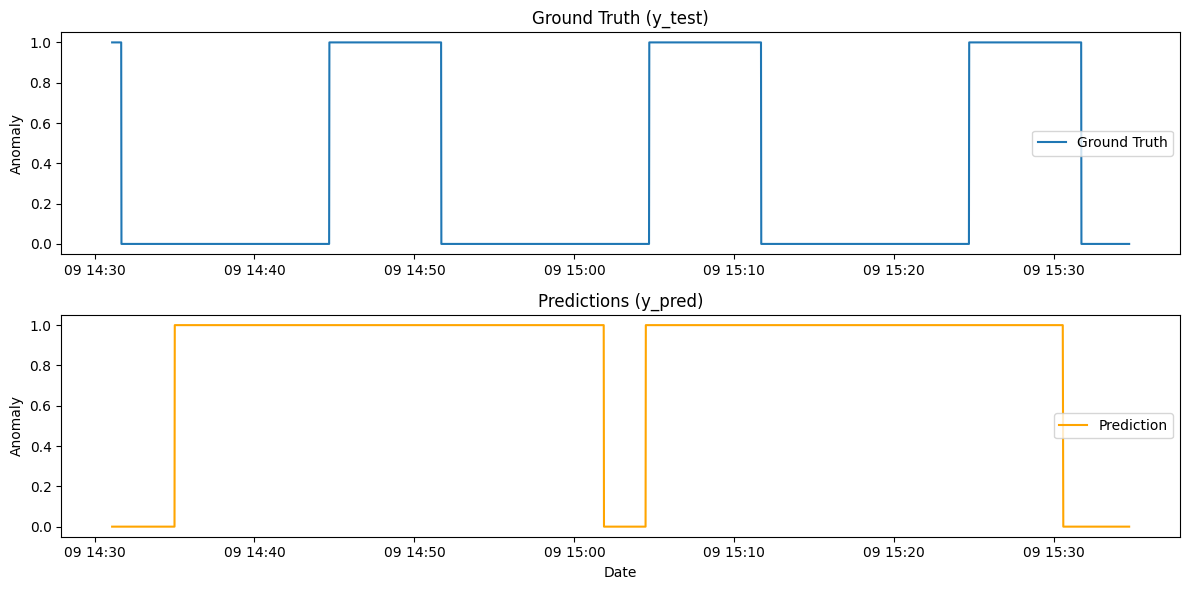

In [34]:
pipe_steps = ["Add Rolling Stats", "Scaling", "PCA",]
ablation_study_benchmark7 = eval_results(valve1_X, valve1_y, Q = 0.3, steps = pipe_steps)

110/110 [==============================] - 0s 2ms/step


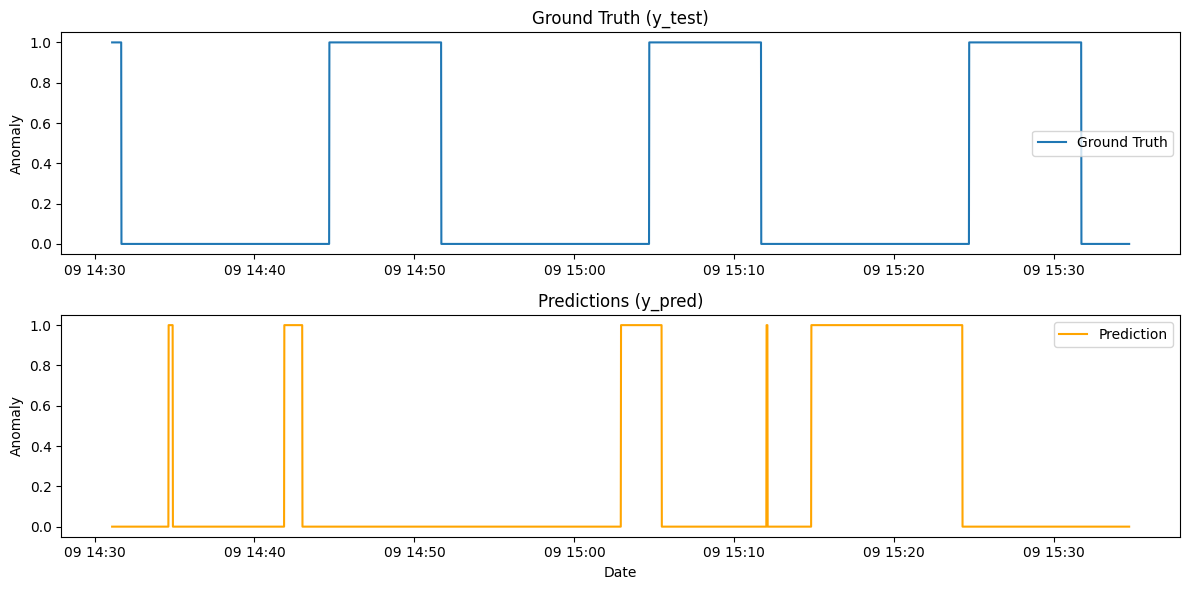

In [35]:
single_step_1 = eval_results(valve1_X, valve1_y, Q = 0.3, steps = [steps[0]])

110/110 [==============================] - 0s 2ms/step


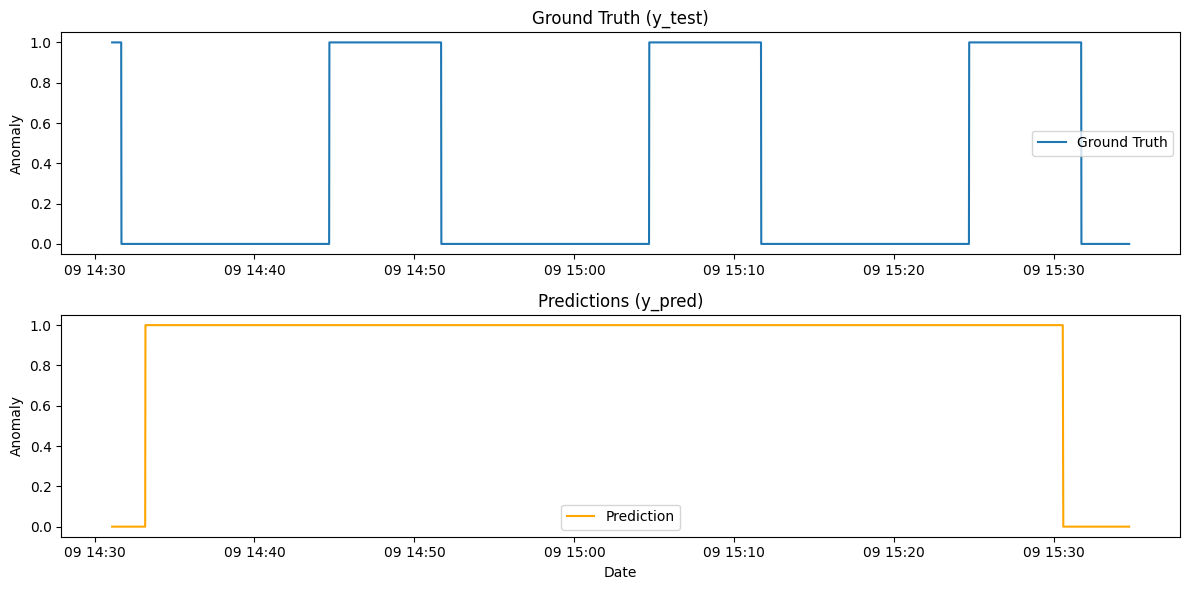

In [36]:
single_step_2 = eval_results(valve1_X, valve1_y, Q = 0.3,  steps = [steps[1]])

110/110 [==============================] - 0s 2ms/step


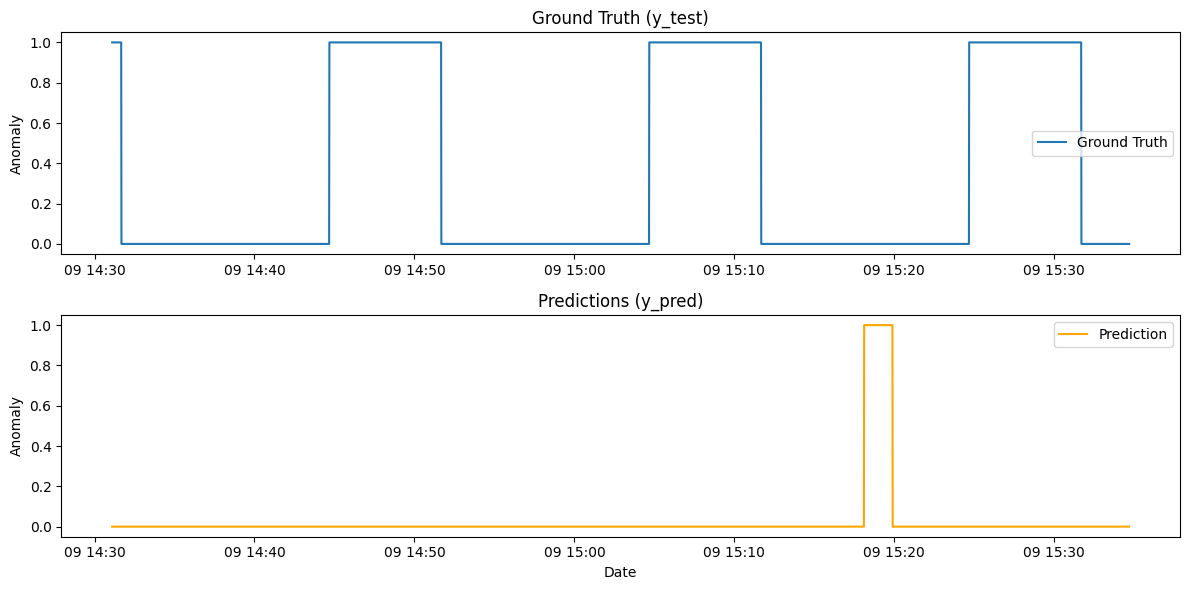

In [37]:
single_step_3 = eval_results(valve1_X, valve1_y, Q = 0.3,  steps = [steps[2]])

110/110 [==============================] - 0s 2ms/step


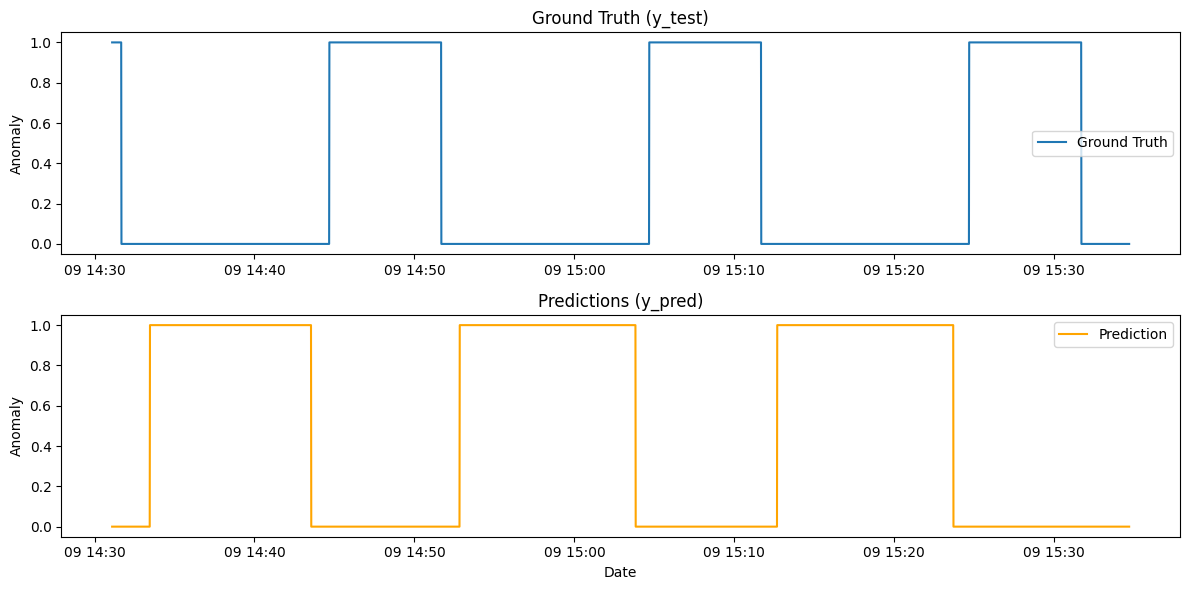

In [38]:
single_step_4 = eval_results(valve1_X, valve1_y, Q = 0.3,  steps = [steps[3]])

110/110 [==============================] - 0s 1ms/step


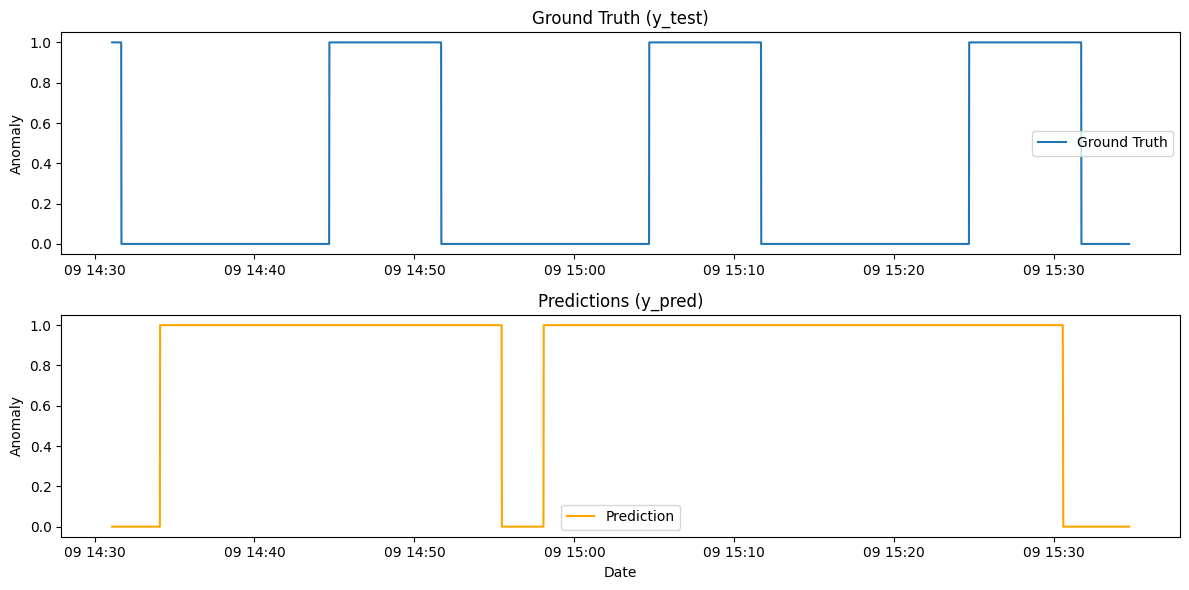

In [39]:
single_step_5 = eval_results(valve1_X, valve1_y, Q = 0.3,  steps = [steps[4]])

In [40]:
valve1_comparison = pd.concat([base_benchmark,
                            single_step_1,
                            single_step_2,
                            single_step_3,
                            single_step_4,
                            single_step_5,
                            ablation_study_benchmark1,
                            ablation_study_benchmark2,
                            ablation_study_benchmark3,
                            ablation_study_benchmark4,
                            ablation_study_benchmark5,
                            ablation_study_benchmark6,
                            ablation_study_benchmark7,
                            pipe_benchmark,
                            pipe_benchmark2], axis=0).round(3)

display(valve1_comparison)

,steps,FPR (FAR),FNR (MAR),ACC
0,[Classifier],0.051,0.619,0.756
0,"[Add Rolling Stats, Classifier]",0.303,0.964,0.472
0,"[Scaling, Classifier]",0.892,0.080,0.384
0,"[Outlier capping, Classifier]",0.043,1.000,0.632
0,"[Features Selection, Classifier]",0.764,1.000,0.156
0,"[PCA, Classifier]",0.809,0.080,0.439
0,"[PCA, Features Selection, Classifier]",0.857,0.080,0.407
0,"[Outlier capping, Features Selection, Classifier]",0.787,1.000,0.141
0,"[Outlier capping, PCA, Classifier]",0.791,0.087,0.448
0,"[Scaling, PCA, Features Selection, Classifier]",0.892,0.080,0.384


In [41]:
valve1_comparison.to_csv('valve1_comparison_Conv_AE.csv')

### Valve 2

24/24 [==============================] - 0s 2ms/step


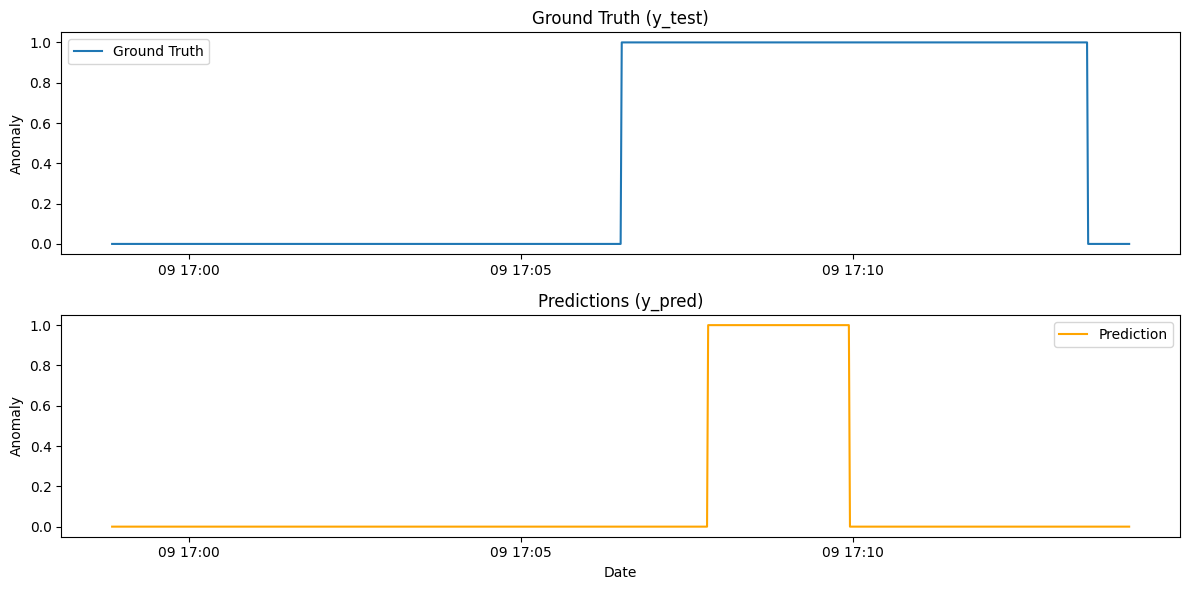

In [42]:
base_benchmark = eval_results(valve2_X, valve2_y, Q = 0.7)

24/24 [==============================] - 0s 2ms/step


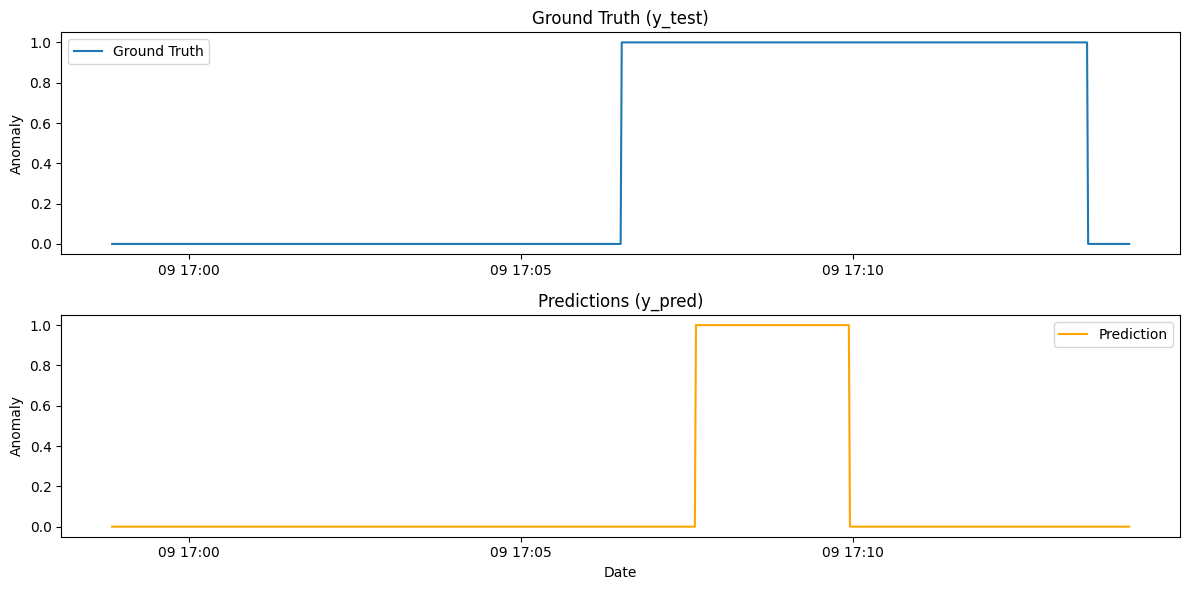

In [43]:
pipe_steps = ["Outlier capping", "PCA", "Features Selection"]
pipe_benchmark = eval_results(valve2_X, valve2_y, Q = 0.7, steps = pipe_steps)

24/24 [==============================] - 0s 3ms/step


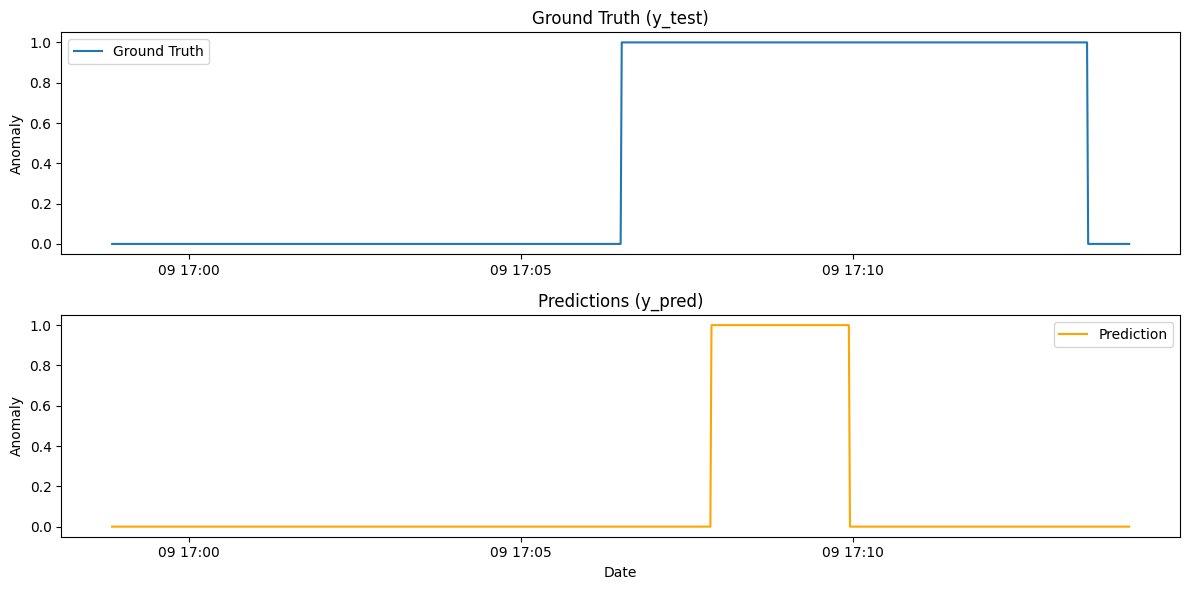

In [44]:
pipe_steps = ["Add Rolling Stats", "Scaling", "PCA", "Features Selection"]
pipe_benchmark2 = eval_results(valve2_X, valve2_y, Q = 0.7, steps = pipe_steps)

24/24 [==============================] - 0s 2ms/step


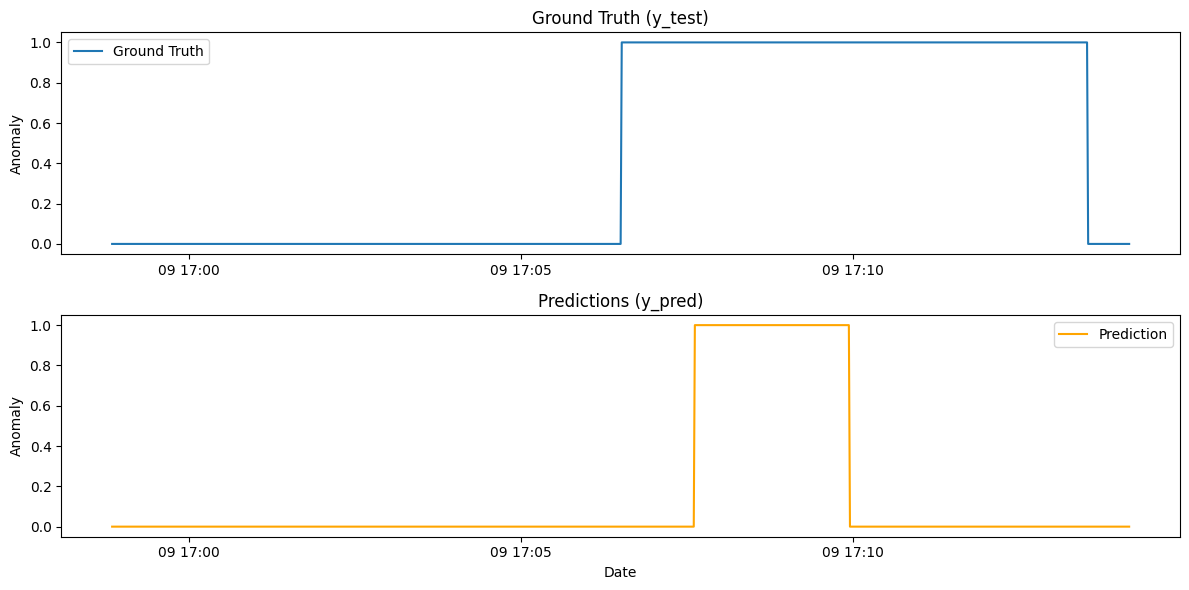

In [45]:
pipe_steps = ["PCA", "Features Selection"]
ablation_study_benchmark1 = eval_results(valve2_X, valve2_y, Q = 0.7, steps = pipe_steps)

24/24 [==============================] - 0s 2ms/step


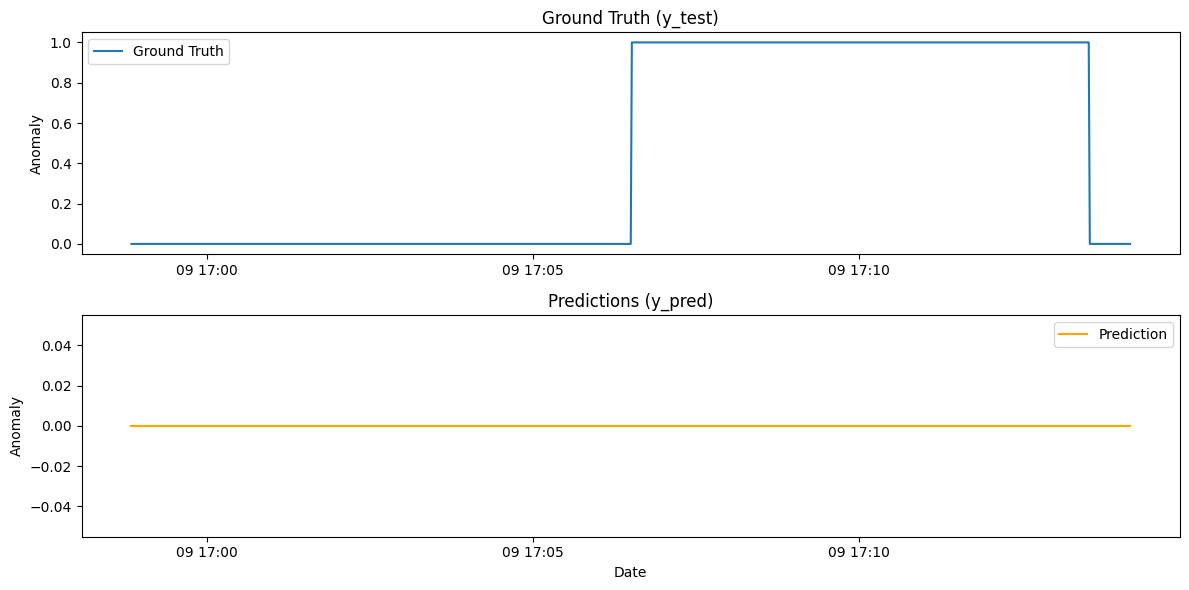

In [46]:
pipe_steps = ["Outlier capping", "Features Selection"]
ablation_study_benchmark2 = eval_results(valve2_X, valve2_y, Q = 0.7, steps = pipe_steps)

24/24 [==============================] - 0s 3ms/step


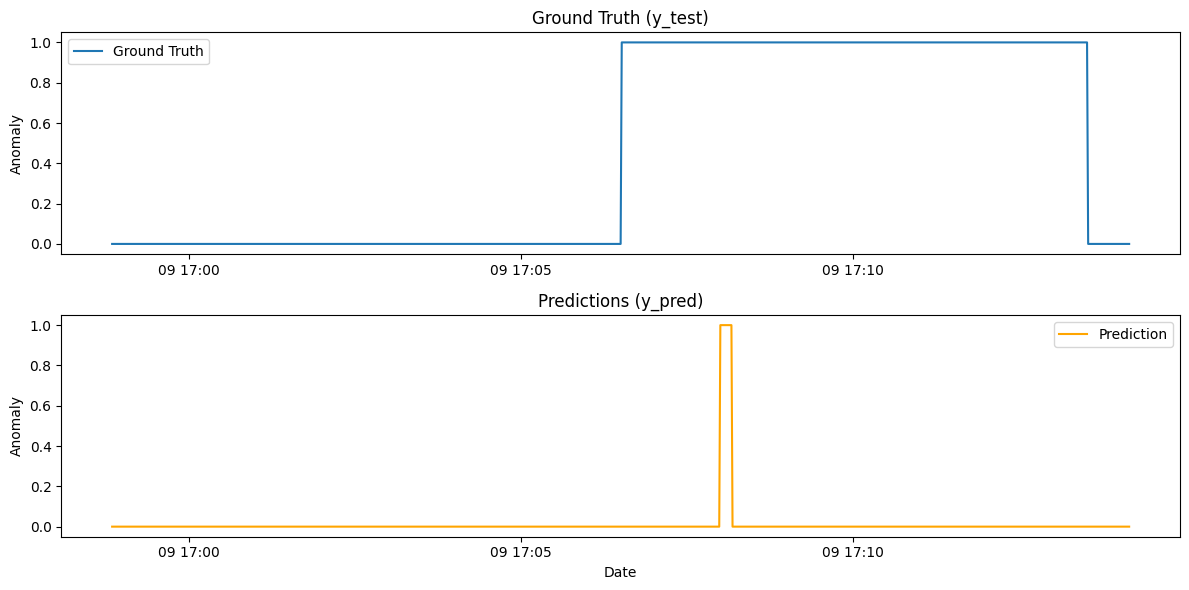

In [47]:
pipe_steps = ["Outlier capping", "PCA"]
ablation_study_benchmark3 = eval_results(valve2_X, valve2_y, Q = 0.7, steps = pipe_steps)

24/24 [==============================] - 0s 3ms/step


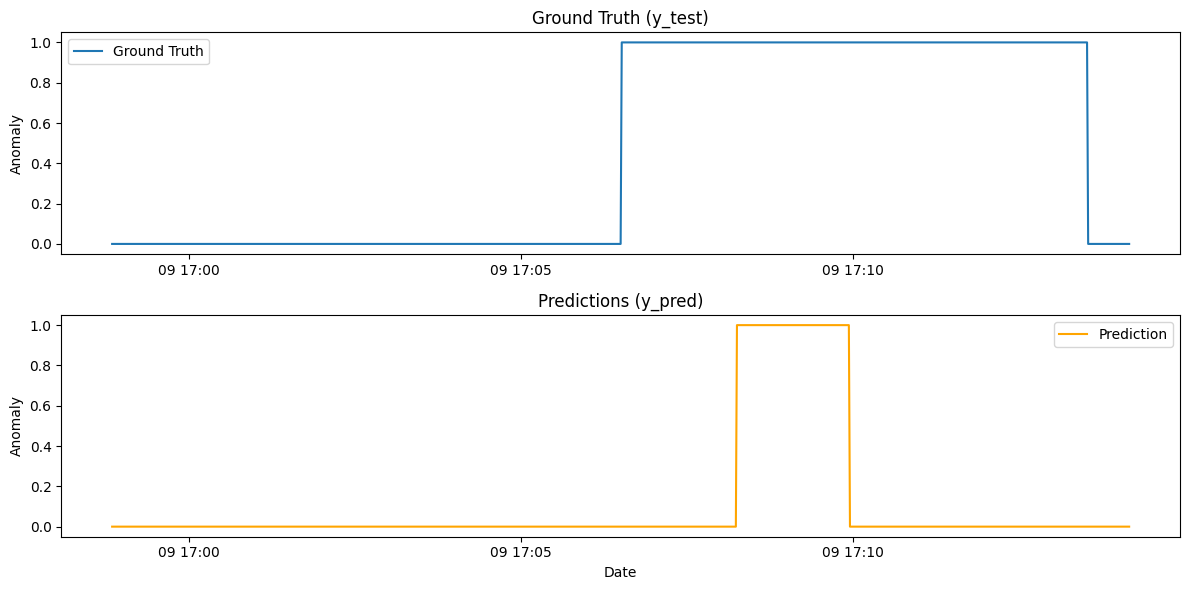

In [48]:
pipe_steps = ["Scaling", "PCA", "Features Selection"]
ablation_study_benchmark4 = eval_results(valve2_X, valve2_y, Q = 0.7, steps = pipe_steps)

24/24 [==============================] - 0s 3ms/step


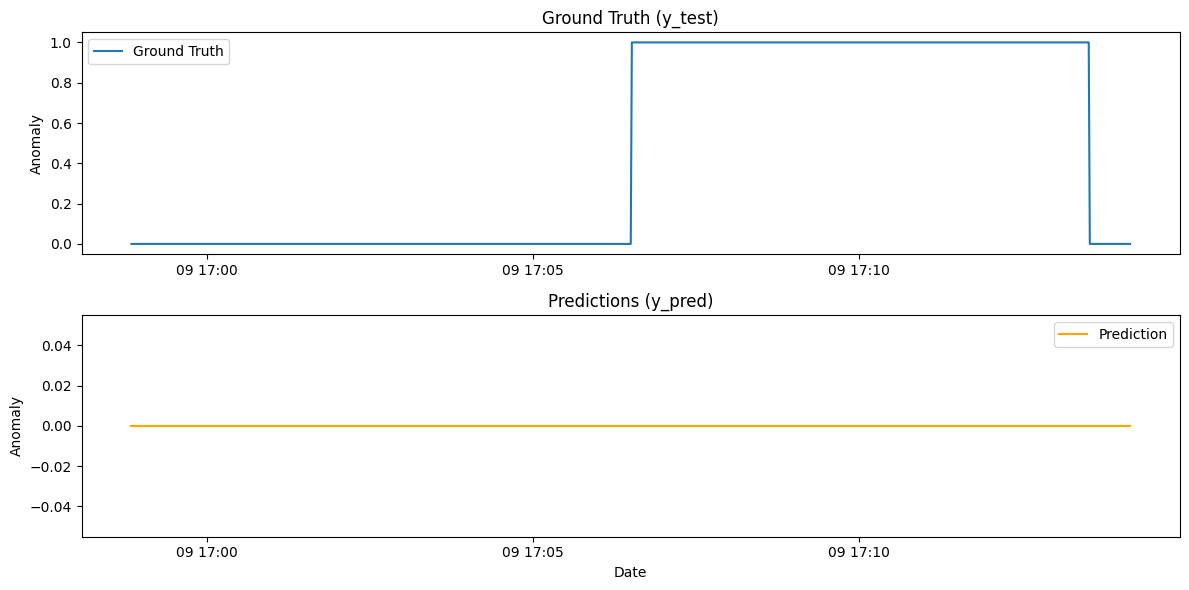

In [49]:
pipe_steps = ["Add Rolling Stats", "PCA", "Features Selection"]
ablation_study_benchmark5 = eval_results(valve2_X, valve2_y, Q = 0.7, steps = pipe_steps)

24/24 [==============================] - 0s 3ms/step


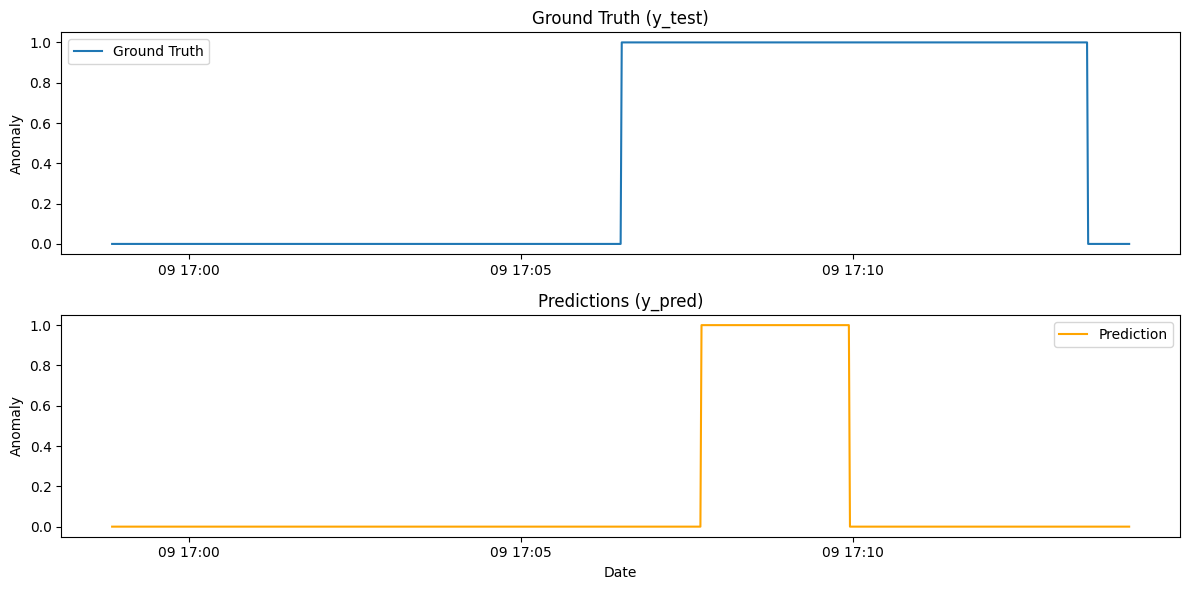

In [50]:
pipe_steps = ["Add Rolling Stats", "Scaling", "Features Selection"]
ablation_study_benchmark6 = eval_results(valve2_X, valve2_y, Q = 0.7, steps = pipe_steps)

24/24 [==============================] - 0s 3ms/step


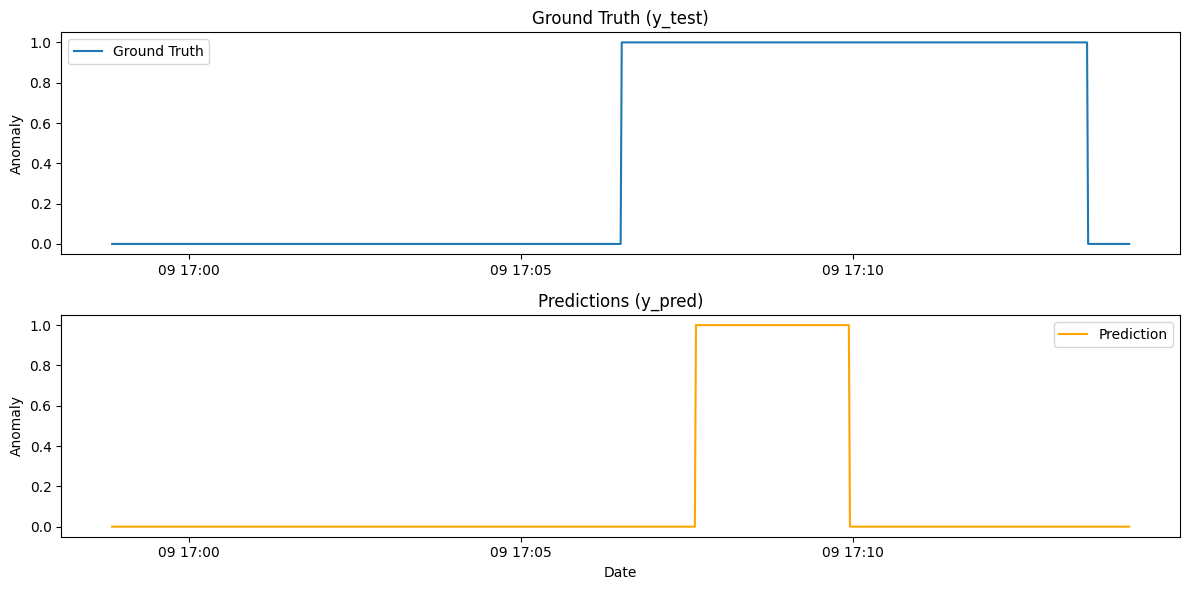

In [51]:
pipe_steps = ["Add Rolling Stats", "Scaling", "PCA",]
ablation_study_benchmark7 = eval_results(valve2_X, valve2_y, Q = 0.7, steps = pipe_steps)

24/24 [==============================] - 0s 3ms/step


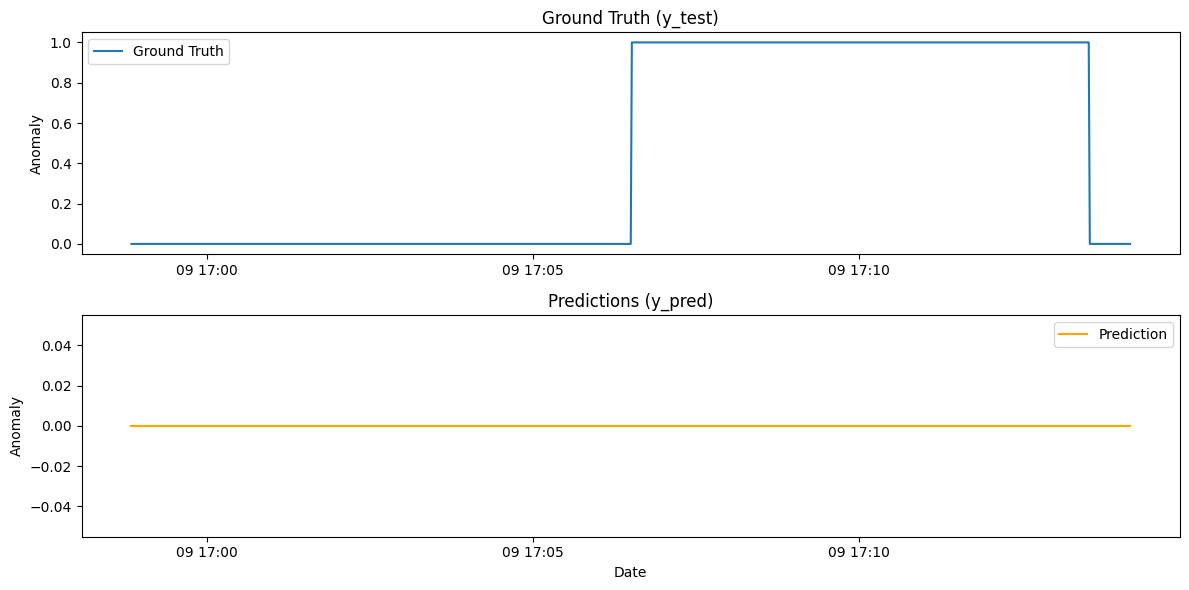

In [52]:
single_step_1 = eval_results(valve2_X, valve2_y, Q = 0.7, steps = [steps[0]])

24/24 [==============================] - 0s 2ms/step


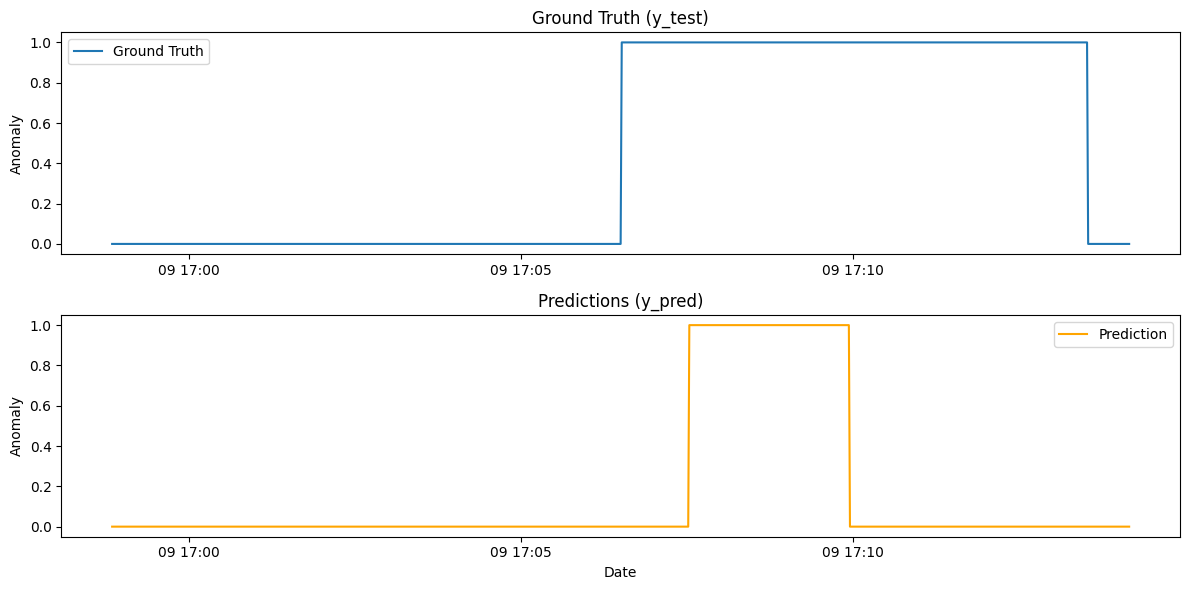

In [53]:
single_step_2 = eval_results(valve2_X, valve2_y, Q = 0.7,  steps = [steps[1]])

24/24 [==============================] - 0s 3ms/step


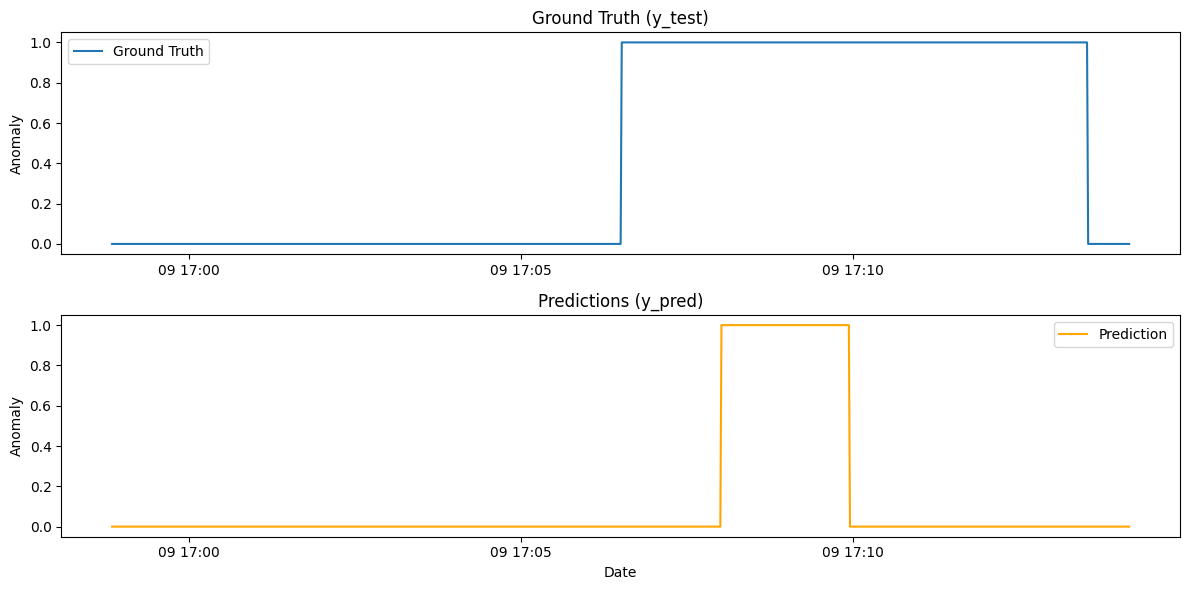

In [54]:
single_step_3 = eval_results(valve2_X, valve2_y, Q = 0.7,  steps = [steps[2]])

24/24 [==============================] - 0s 2ms/step


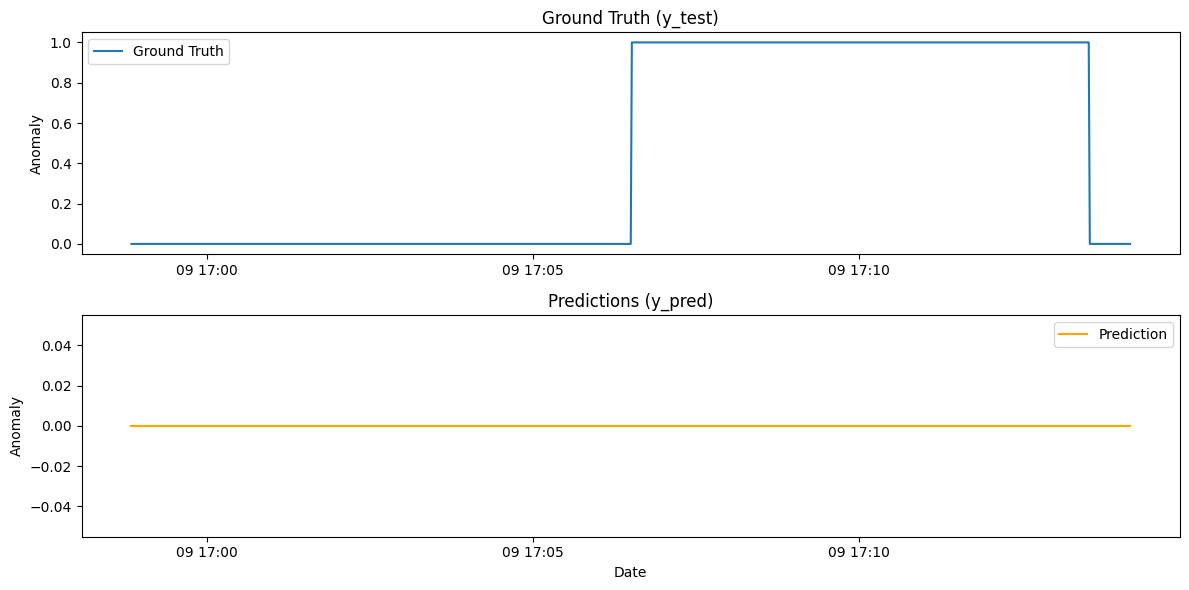

In [55]:
single_step_4 = eval_results(valve2_X, valve2_y, Q = 0.7,  steps = [steps[3]])

24/24 [==============================] - 0s 2ms/step


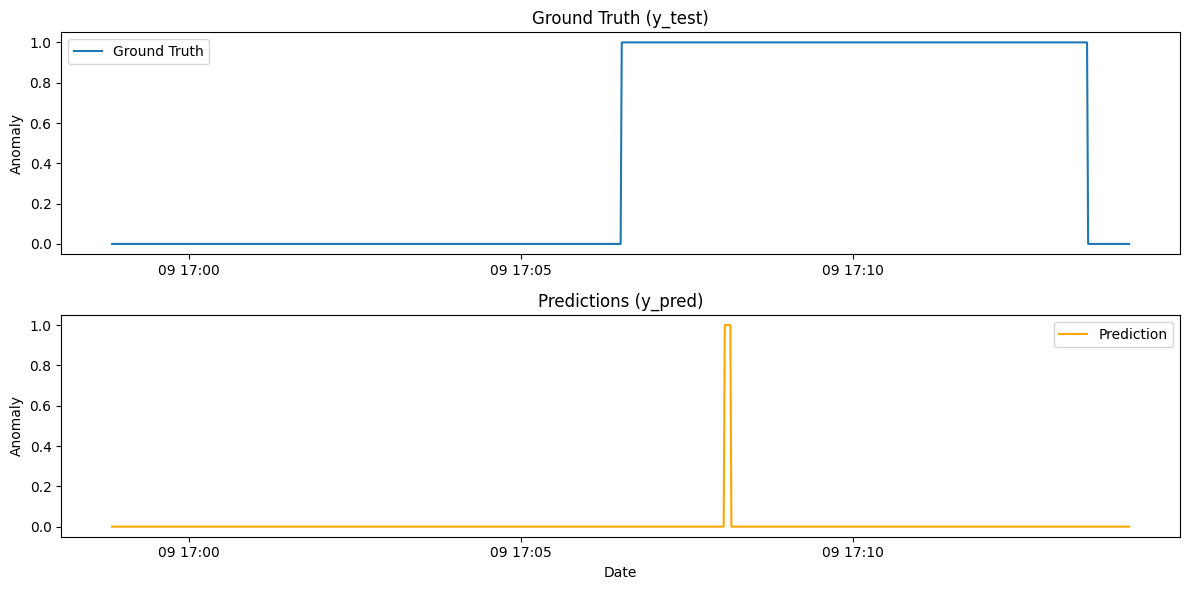

In [56]:
single_step_5 = eval_results(valve2_X, valve2_y, Q = 0.7,  steps = [steps[4]])

In [57]:
valve2_comparison = pd.concat([base_benchmark,
                            single_step_1,
                            single_step_2,
                            single_step_3,
                            single_step_4,
                            single_step_5,
                            ablation_study_benchmark1,
                            ablation_study_benchmark2,
                            ablation_study_benchmark3,
                            ablation_study_benchmark4,
                            ablation_study_benchmark5,
                            ablation_study_benchmark6,
                            ablation_study_benchmark7,
                            pipe_benchmark,
                            pipe_benchmark2], axis=0).round(3)

display(valve2_comparison)

,steps,FPR (FAR),FNR (MAR),ACC
0,[Classifier],0.0,0.696,0.681
0,"[Add Rolling Stats, Classifier]",0.0,1.000,0.542
0,"[Scaling, Classifier]",0.0,0.656,0.700
0,"[Outlier capping, Classifier]",0.0,0.727,0.667
0,"[Features Selection, Classifier]",0.0,1.000,0.542
0,"[PCA, Classifier]",0.0,0.985,0.549
0,"[PCA, Features Selection, Classifier]",0.0,0.668,0.694
0,"[Outlier capping, Features Selection, Classifier]",0.0,1.000,0.542
0,"[Outlier capping, PCA, Classifier]",0.0,0.975,0.554
0,"[Scaling, PCA, Features Selection, Classifier]",0.0,0.759,0.652


In [58]:
valve2_comparison.to_csv('valve2_comparison_Conv_AE.csv')

### Other Anomalies

89/89 [==============================] - 0s 2ms/step


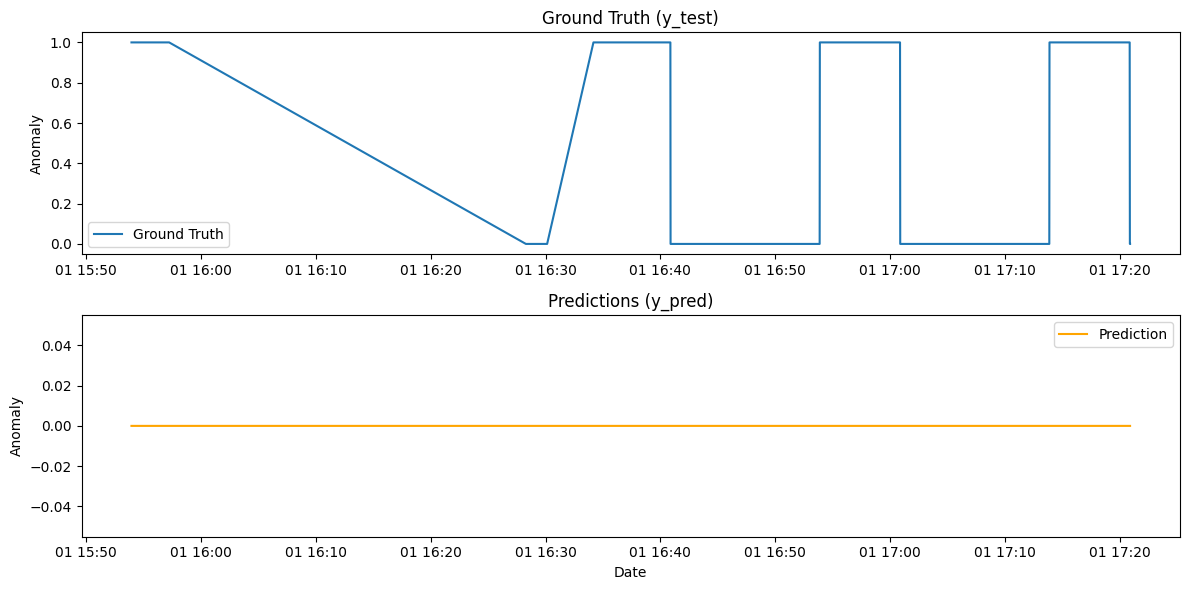

In [59]:
base_benchmark = eval_results(other_anomaly_X, other_anomaly_y, Q = 0.25)

89/89 [==============================] - 0s 2ms/step


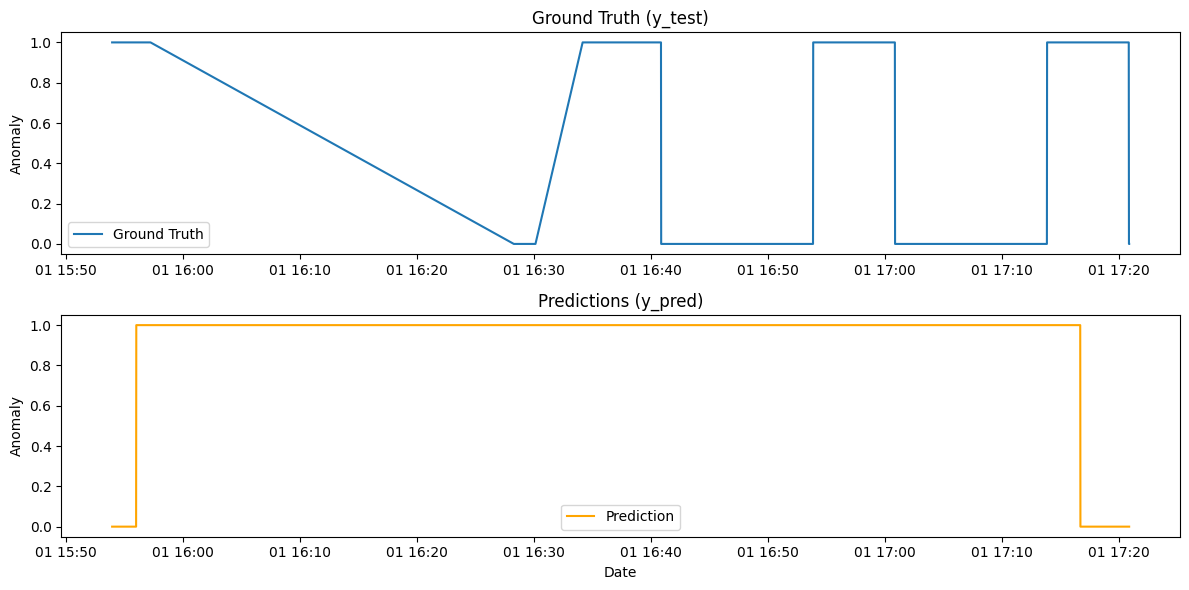

In [60]:
pipe_steps = ["Outlier capping", "PCA", "Features Selection"]
pipe_benchmark = eval_results(other_anomaly_X, other_anomaly_y, Q = 0.25, steps = pipe_steps)

89/89 [==============================] - 0s 3ms/step


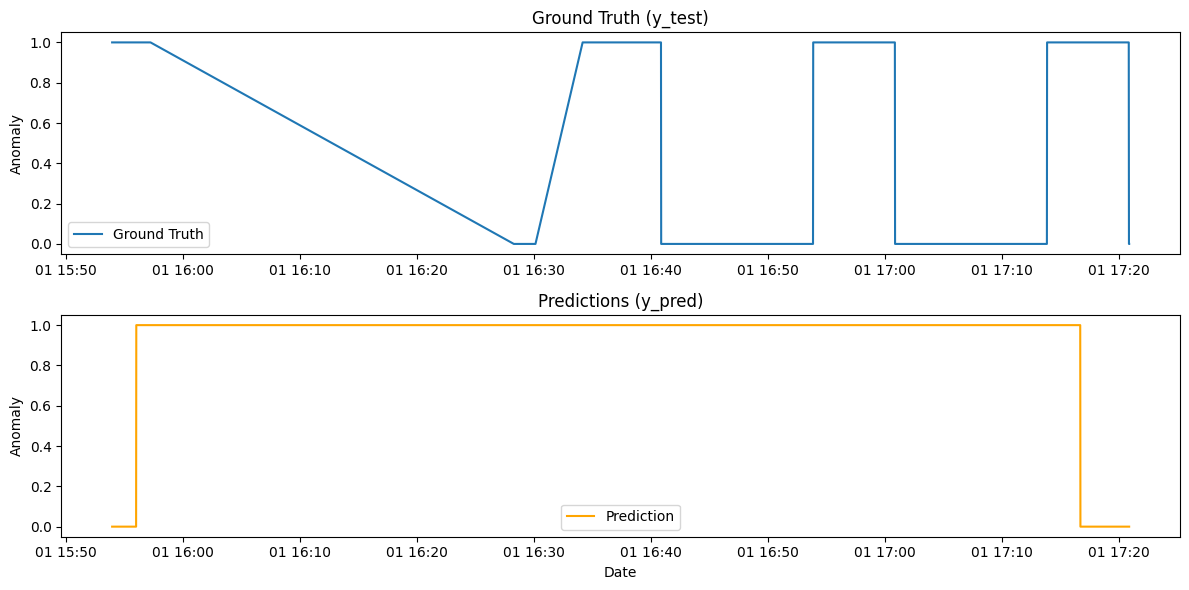

In [61]:
pipe_steps = ["Add Rolling Stats", "Scaling", "PCA", "Features Selection"]
pipe_benchmark2 = eval_results(other_anomaly_X, other_anomaly_y, Q = 0.25, steps = pipe_steps)

89/89 [==============================] - 0s 2ms/step


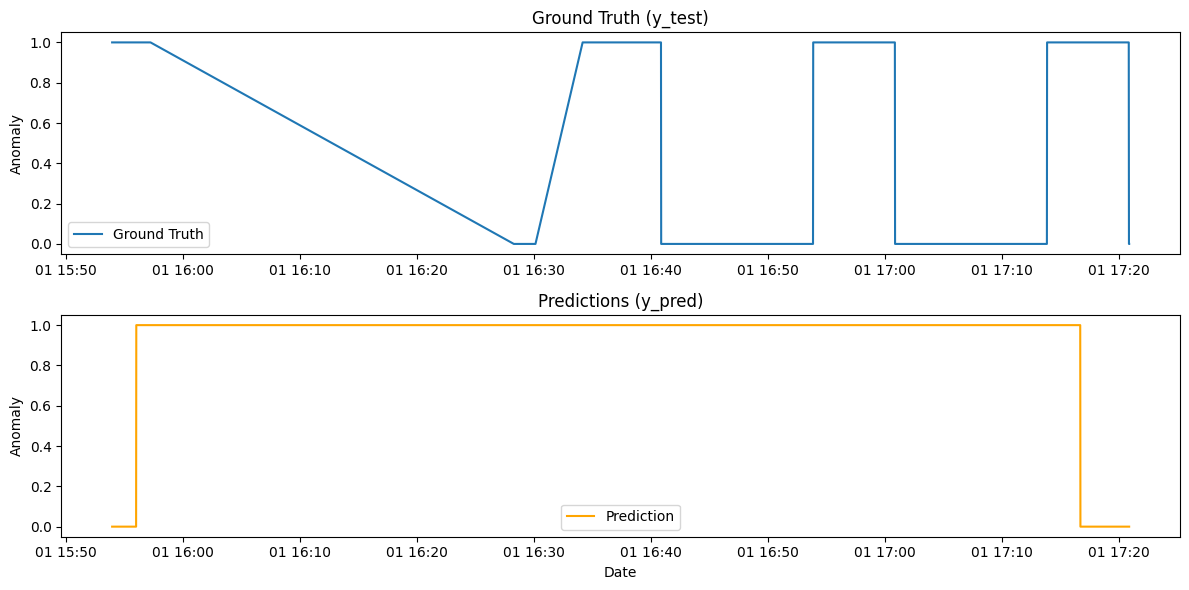

In [62]:
pipe_steps = ["PCA", "Features Selection"]
ablation_study_benchmark1 = eval_results(other_anomaly_X, other_anomaly_y, Q = 0.25, steps = pipe_steps)

89/89 [==============================] - 0s 3ms/step


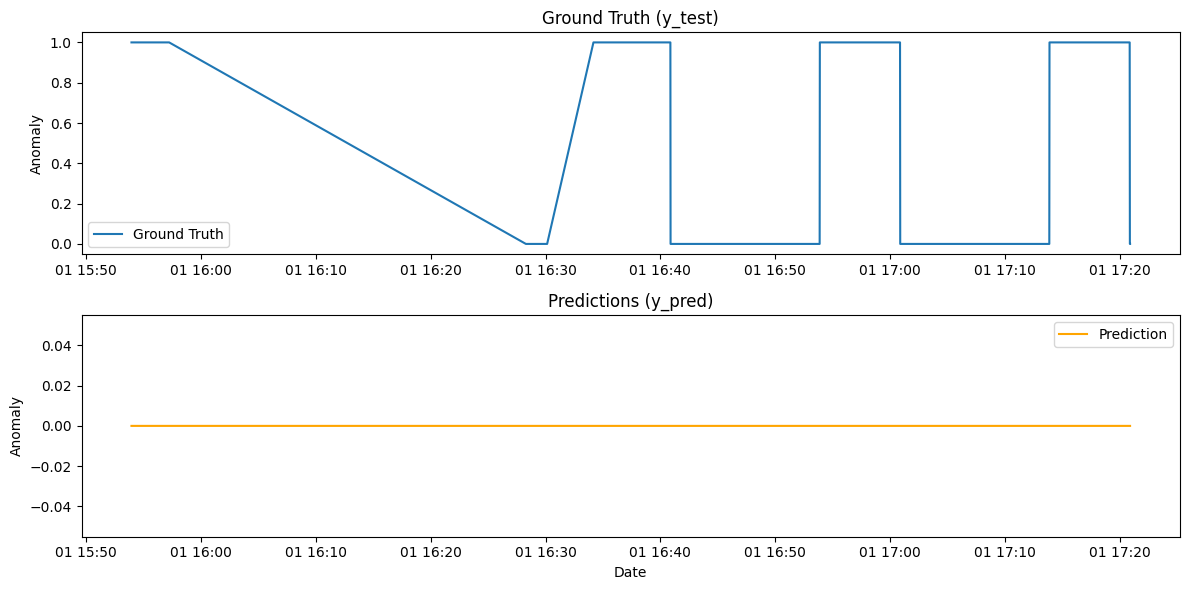

In [63]:
pipe_steps = ["Outlier capping", "Features Selection"]
ablation_study_benchmark2 = eval_results(other_anomaly_X, other_anomaly_y, Q = 0.25, steps = pipe_steps)

89/89 [==============================] - 0s 4ms/step


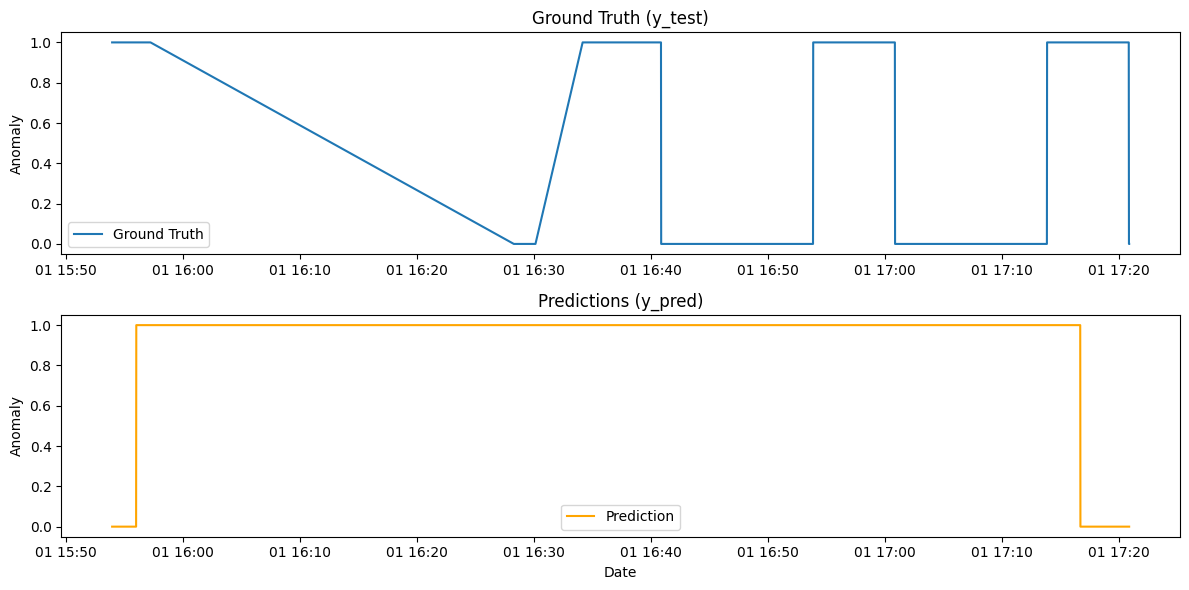

In [64]:
pipe_steps = ["Outlier capping", "PCA"]
ablation_study_benchmark3 = eval_results(other_anomaly_X, other_anomaly_y, Q = 0.25, steps = pipe_steps)

89/89 [==============================] - 0s 2ms/step


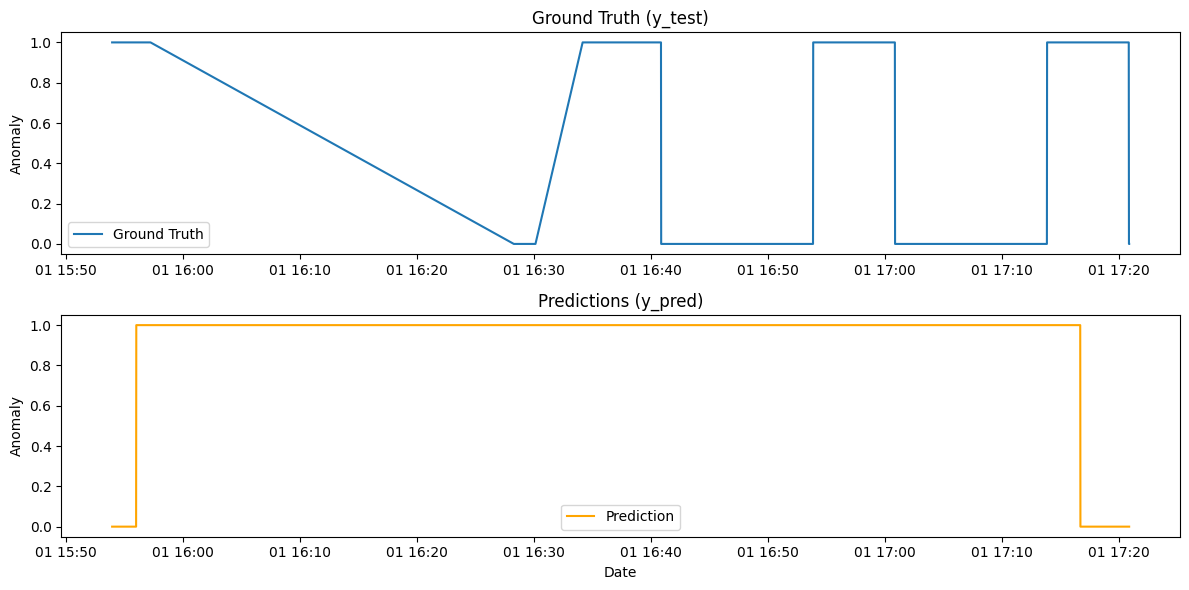

In [65]:
pipe_steps = ["Scaling", "PCA", "Features Selection"]
ablation_study_benchmark4 = eval_results(other_anomaly_X, other_anomaly_y, Q = 0.25, steps = pipe_steps)

89/89 [==============================] - 0s 3ms/step


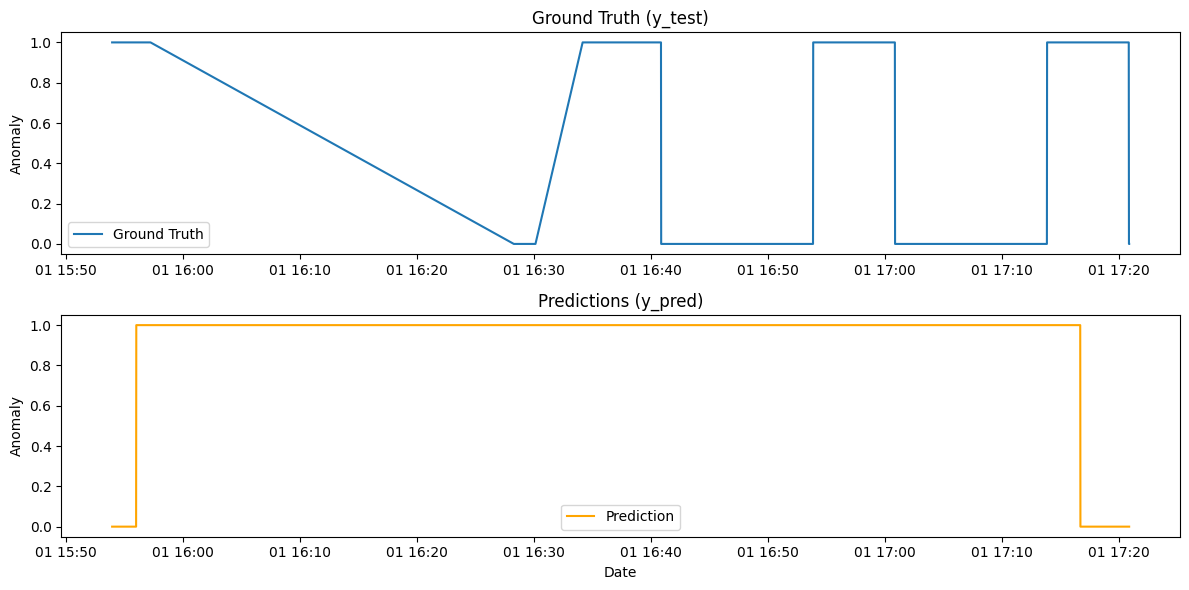

In [66]:
pipe_steps = ["Add Rolling Stats", "PCA", "Features Selection"]
ablation_study_benchmark5 = eval_results(other_anomaly_X, other_anomaly_y, Q = 0.25, steps = pipe_steps)

89/89 [==============================] - 0s 3ms/step


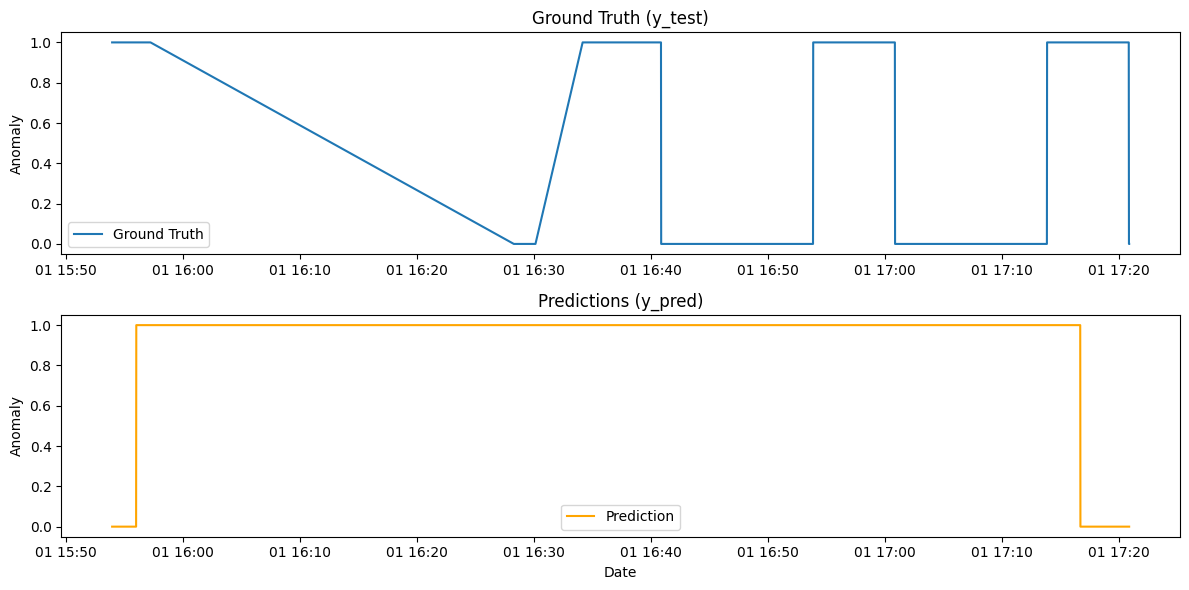

In [67]:
pipe_steps = ["Add Rolling Stats", "Scaling", "Features Selection"]
ablation_study_benchmark6 = eval_results(other_anomaly_X, other_anomaly_y, Q = 0.25, steps = pipe_steps)

89/89 [==============================] - 0s 3ms/step


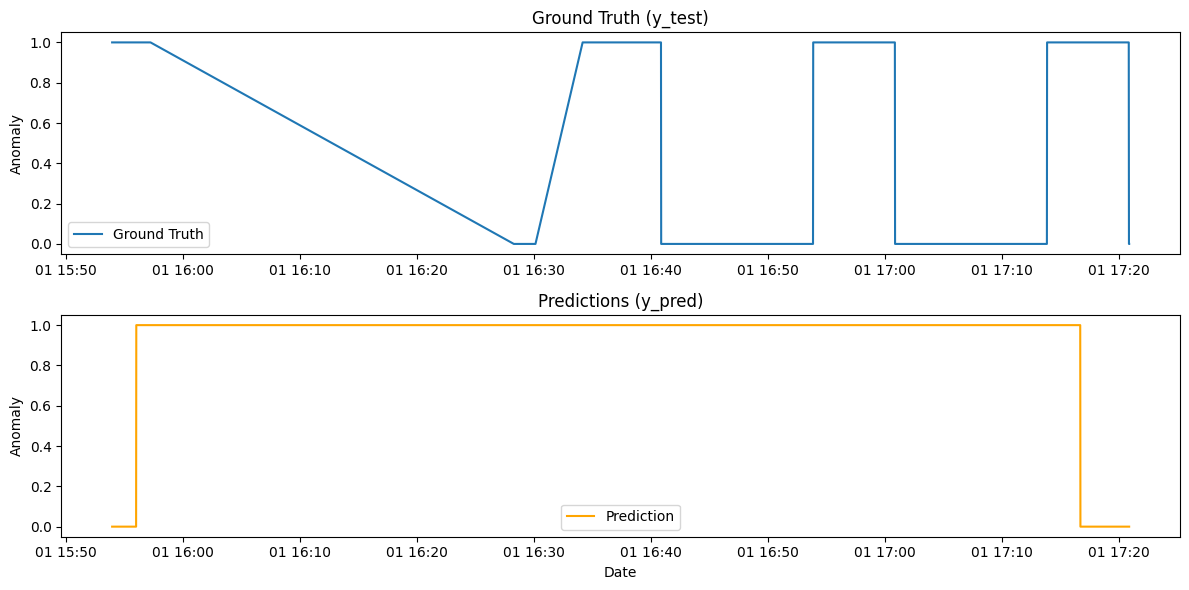

In [68]:
pipe_steps = ["Add Rolling Stats", "Scaling", "PCA",]
ablation_study_benchmark7 = eval_results(other_anomaly_X, other_anomaly_y, Q = 0.25, steps = pipe_steps)

89/89 [==============================] - 0s 3ms/step


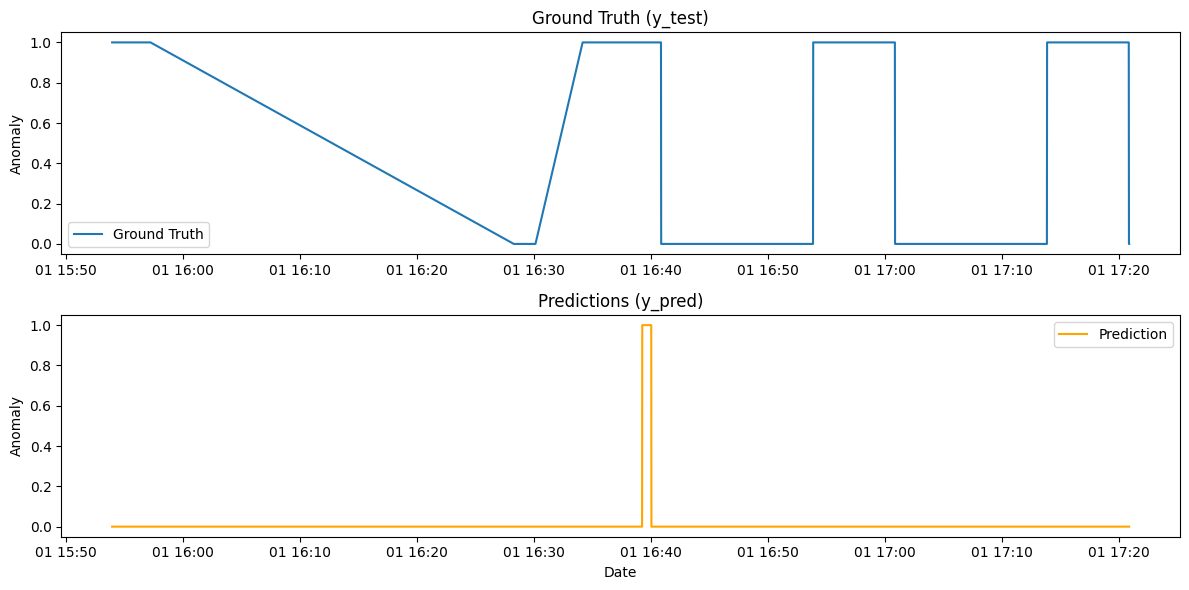

In [69]:
single_step_1 = eval_results(other_anomaly_X, other_anomaly_y, Q = 0.25, steps = [steps[0]])

89/89 [==============================] - 0s 3ms/step


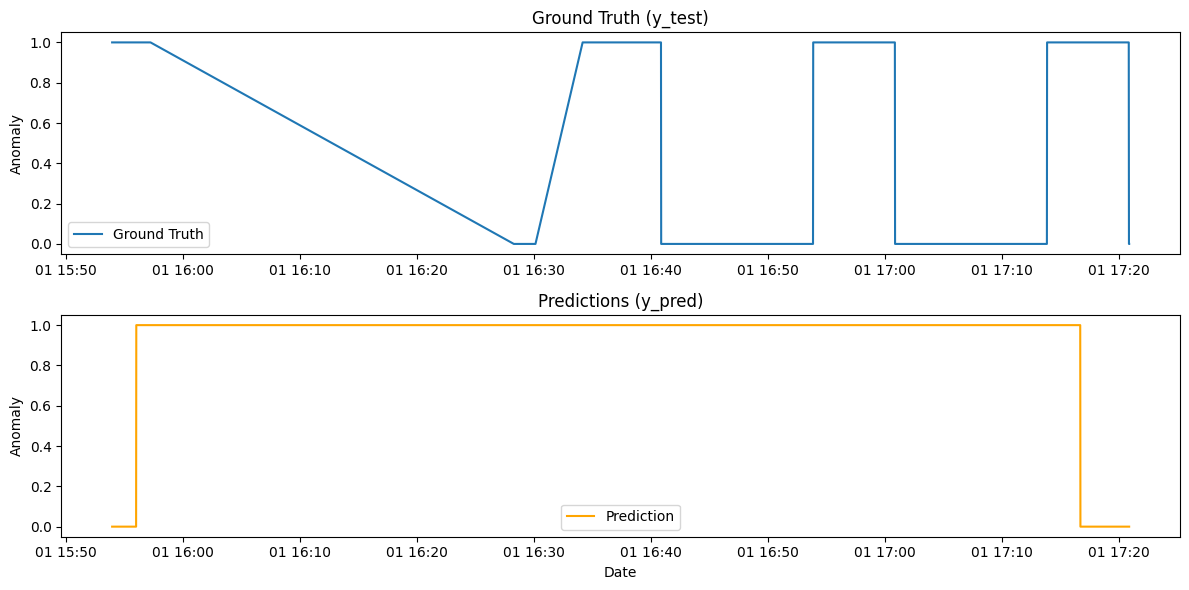

In [70]:
single_step_2 = eval_results(other_anomaly_X, other_anomaly_y, Q = 0.25,  steps = [steps[1]])

89/89 [==============================] - 0s 3ms/step


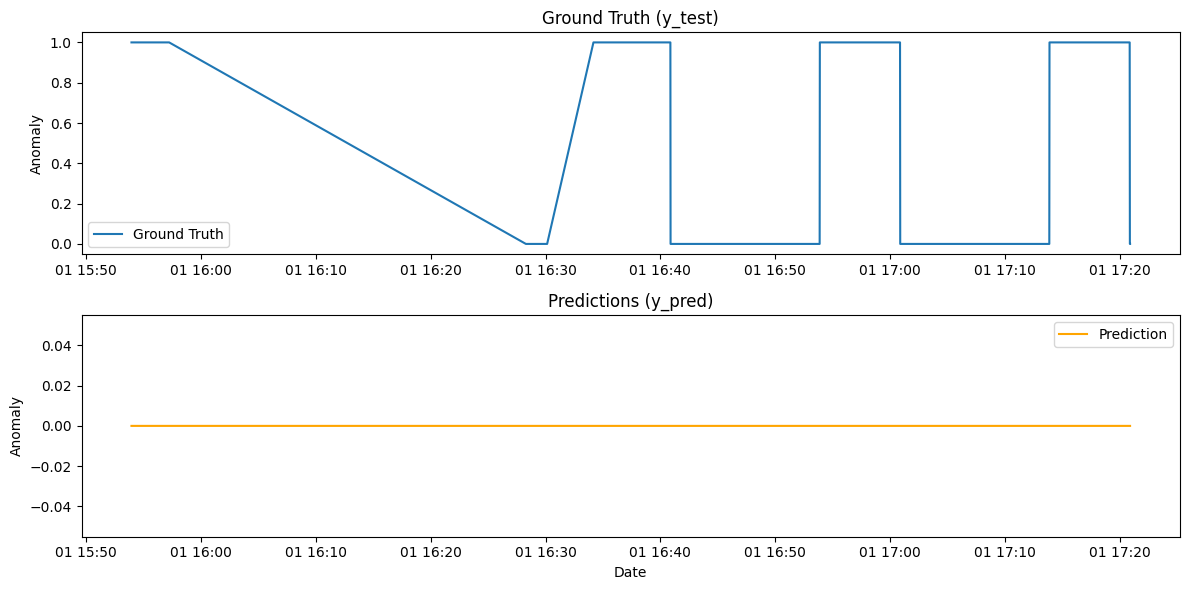

In [71]:
single_step_3 = eval_results(other_anomaly_X, other_anomaly_y, Q = 0.25,  steps = [steps[2]])

89/89 [==============================] - 0s 2ms/step


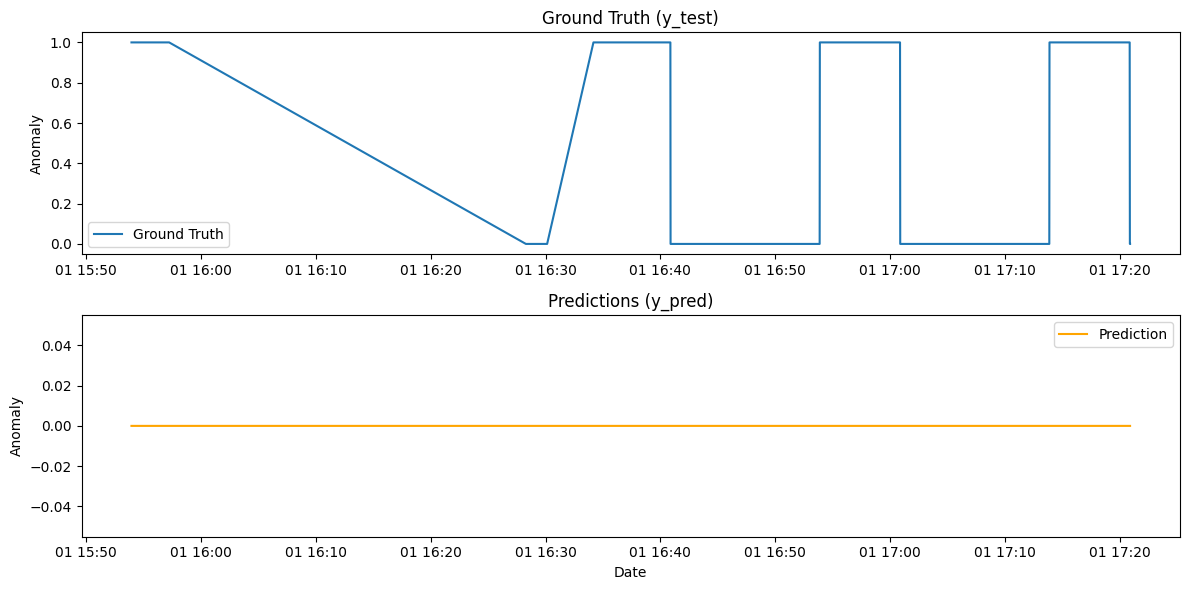

In [72]:
single_step_4 = eval_results(other_anomaly_X, other_anomaly_y, Q = 0.25,  steps = [steps[3]])

89/89 [==============================] - 0s 3ms/step


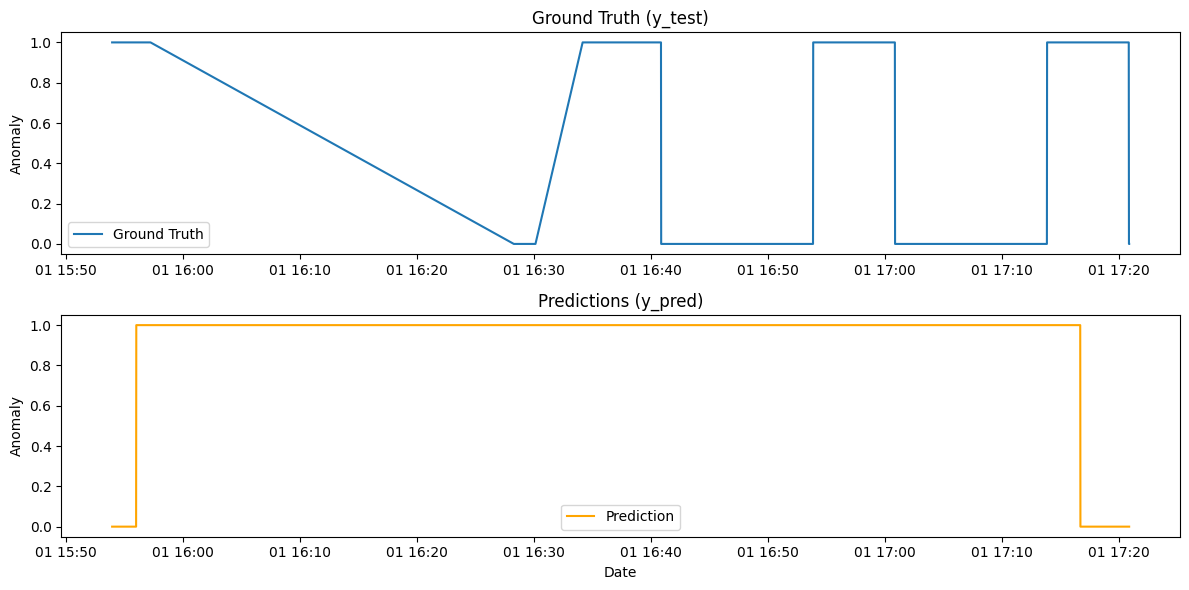

In [73]:
single_step_5 = eval_results(other_anomaly_X, other_anomaly_y, Q = 0.25,  steps = [steps[4]])

In [74]:
other_anomalies_comparison = pd.concat([base_benchmark,
                                    single_step_1,
                                    single_step_2,
                                    single_step_3,
                                    single_step_4,
                                    single_step_5,
                                    ablation_study_benchmark1,
                                    ablation_study_benchmark2,
                                    ablation_study_benchmark3,
                                    ablation_study_benchmark4,
                                    ablation_study_benchmark5,
                                    ablation_study_benchmark6,
                                    ablation_study_benchmark7,
                                    pipe_benchmark,
                                    pipe_benchmark2], axis=0).round(3)

display(other_anomalies_comparison)

,steps,FPR (FAR),FNR (MAR),ACC
0,[Classifier],0.000,1.000,0.537
0,"[Add Rolling Stats, Classifier]",0.000,0.967,0.553
0,"[Scaling, Classifier]",0.999,0.259,0.343
0,"[Outlier capping, Classifier]",0.000,1.000,0.537
0,"[Features Selection, Classifier]",0.000,1.000,0.537
0,"[PCA, Classifier]",0.999,0.259,0.343
0,"[PCA, Features Selection, Classifier]",0.999,0.259,0.343
0,"[Outlier capping, Features Selection, Classifier]",0.000,1.000,0.537
0,"[Outlier capping, PCA, Classifier]",0.999,0.259,0.343
0,"[Scaling, PCA, Features Selection, Classifier]",0.999,0.259,0.343


In [75]:
other_anomalies_comparison.to_csv('other_anomalies_comparison_Conv_AE.csv')